In [ ]:
# imports

import numpy as np
import scipy
import pickle
import matplotlib
import matplotlib.pyplot as plt
import copy
import logging
import itertools
from datetime import datetime
datet = datetime.now().strftime("%d%m_%H%M")
import os
import sys
sys.path.insert(0, os.path.abspath('..')) 

from scripts.fitting_functions import *
from scripts.plotting_functions import *
from scripts.simulation_functions import *
from scripts.analytics_functions import *

%matplotlib inline
plt.rcParams.update({
    'figure.dpi': 200,
    'text.usetex': False, 
    'mathtext.fontset': 'custom',              
    'mathtext.rm': 'Times New Roman',          
    'mathtext.it': 'Times New Roman:italic',   
    'mathtext.bf': 'Times New Roman:bold',      
    'axes.unicode_minus': False,                
    'font.family': 'sans-serif',               
    'font.sans-serif': ['Arial'],   
    'font.size': 14          
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# load data

data = scipy.io.loadmat('../data/Data_cell_types_small_size.mat')
keys = list(data.keys())
data_keys = keys[3:7]
data_fit_list = [data[key] for key in data_keys]
contrasts = data[keys[-1]]
c_range = contrasts.flatten()/100

N_datapoints = np.array([len(cell_type) for cell_type in data_fit_list])
means = np.array([np.mean(cell_type, axis=0) for cell_type in data_fit_list])
covs = np.array([np.cov(np.array(cell_type).T) for cell_type in data_fit_list])
sems = np.array([np.sqrt(np.diag(cov) / N_datapoints[i]) for i, cov in enumerate(covs)])

# load params/fits from file

with open('../data/fits_cnd1_top200_250102_125616.pkl', 'rb') as f: 
    top_fits, top_params, top_likelihoods = pickle.load(f)

# global constants for analytics

TAU = np.diag([0.02,0.01,0.01,0.01]) # time consts (20ms E, 10ms I)
tau_noise = 2e-2 # OU only (note 50ms 'slow noise' in Hennequin paper)
sigma_noise = 1e-2 # noise magnitude
variable = 'voltage' # variable to simulate (voltage or rate)
noise_type = 'white' # noise type (none, white or OU). OU only for rate

# select fit, contrast

k = 7 # fit index
contrast = 1 # contrast from c_range
fit = top_fits[k]
params = top_params[k]
c_ind = np.where(c_range == contrast)[0][0]
fit_c = fit[:,c_ind] # fixed point rates at fit, contrast


### stability analysis

/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite


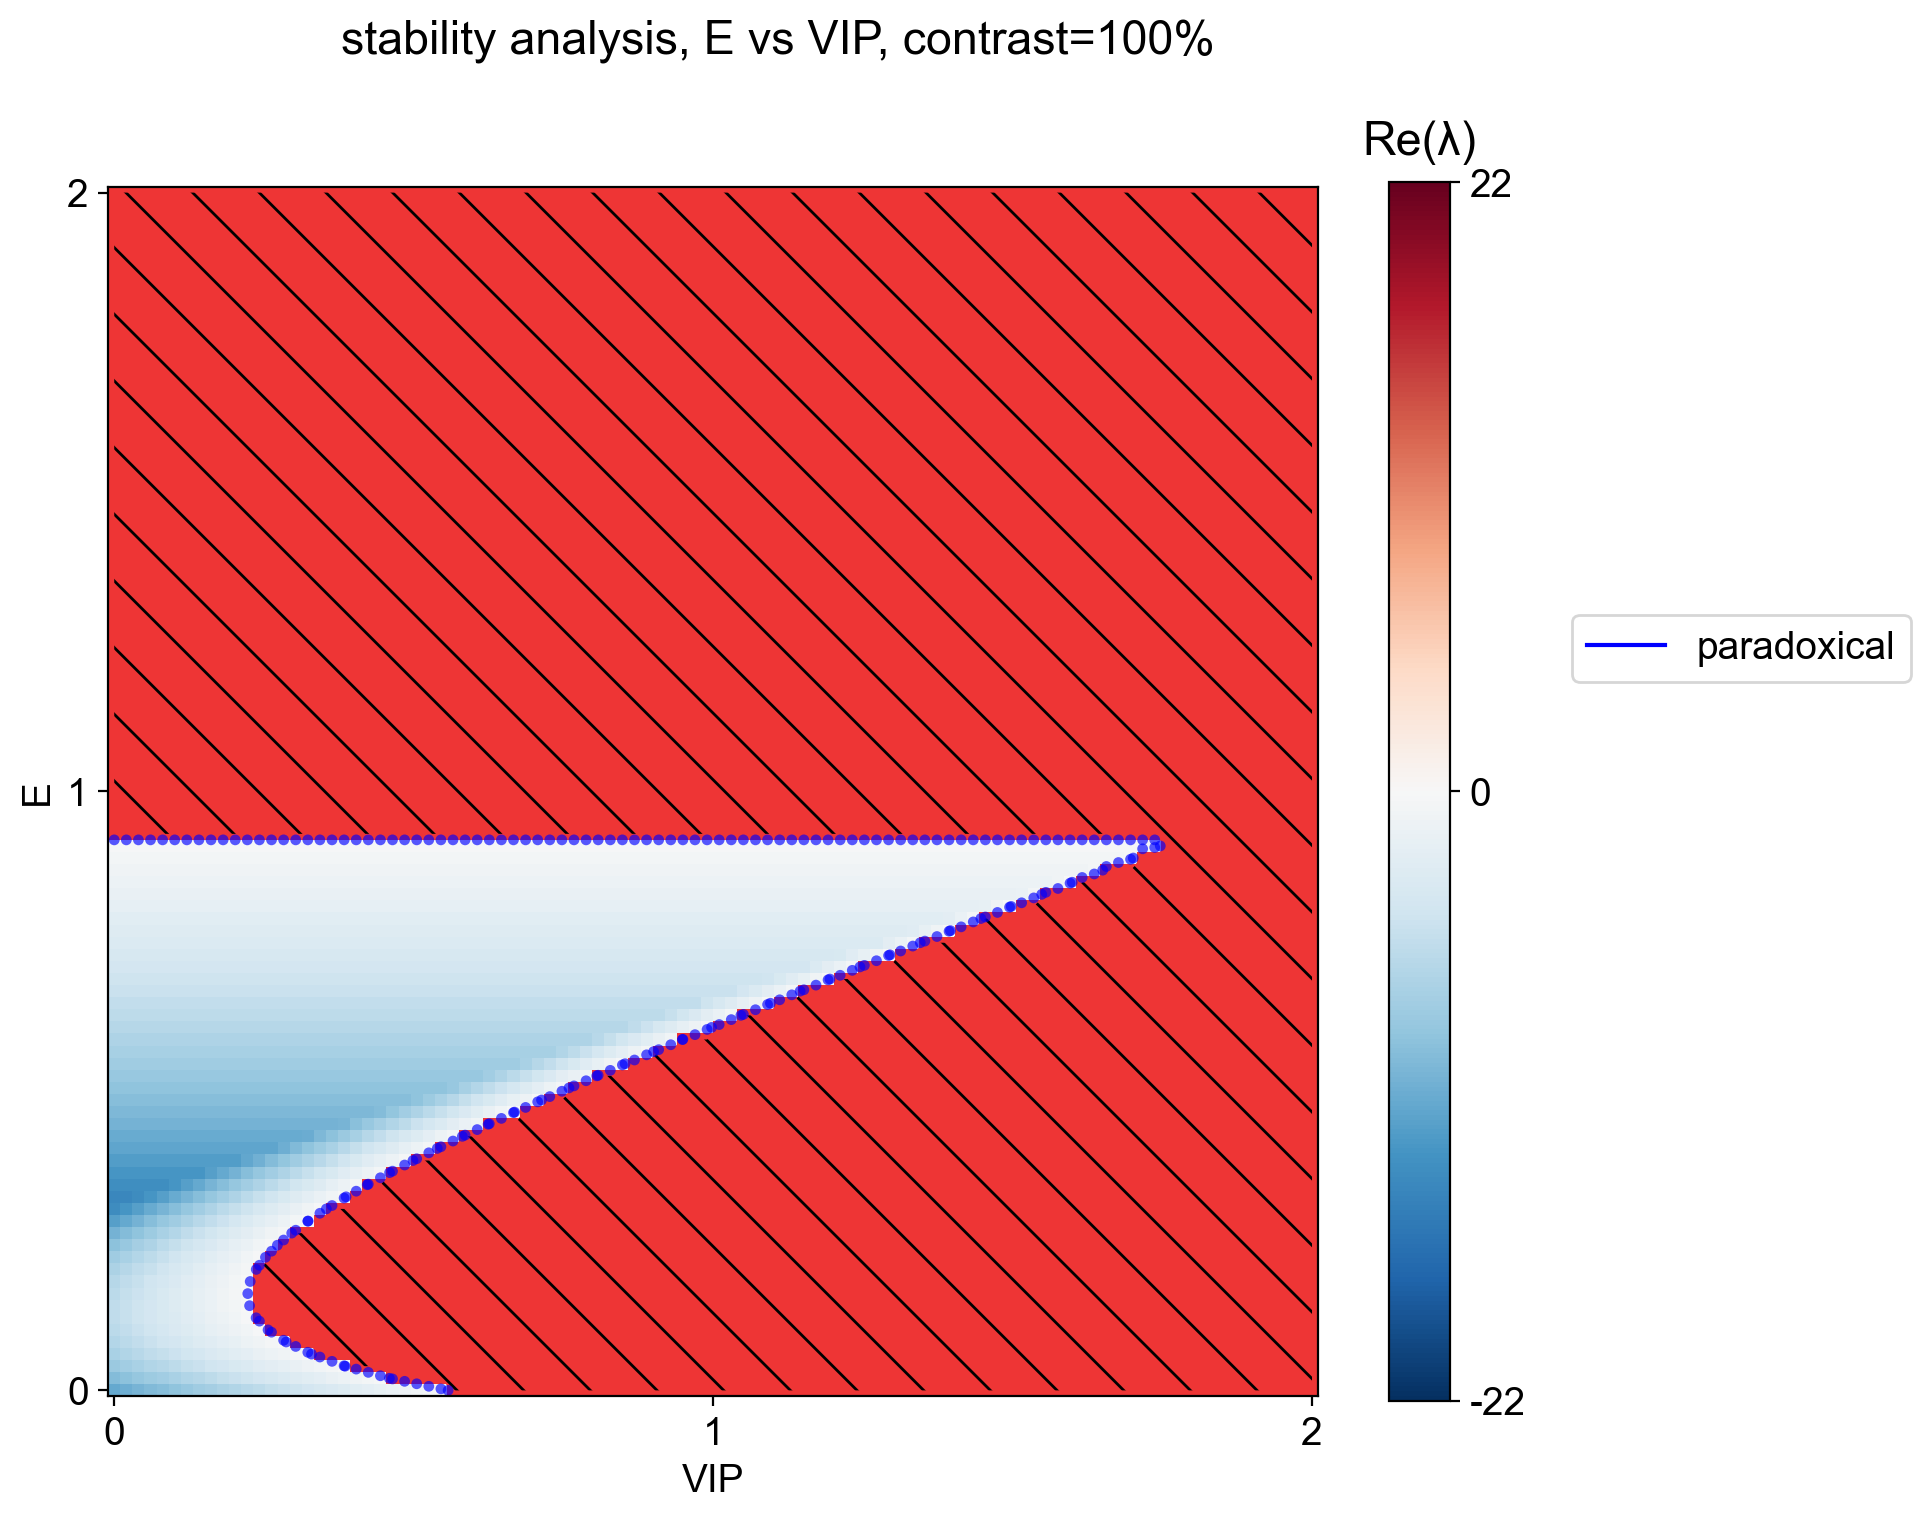

In [ ]:
# external input to two populations for single fit/contrast

lims = [0,2] # limits of external inputs to pop1/pop2
points = 100 # x/y resolution of heatmap
pop1 = 'E' # population 1 (y)
pop2 = 'V' # population 2 (x)
param_plot = 'stability' # parameter to plot {'stability', 'rate', 'gain', 'variance'}
pop_plot = 'E' # population to plot {'E', 'P', 'S', 'V'}

fig = plot_single_heatmap_any(fit_c, params, lims, points, pop1, pop2, contrast,
                 sigma_noise, TAU, tau_noise, variable, noise_type, k,
                 param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)

/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:688: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


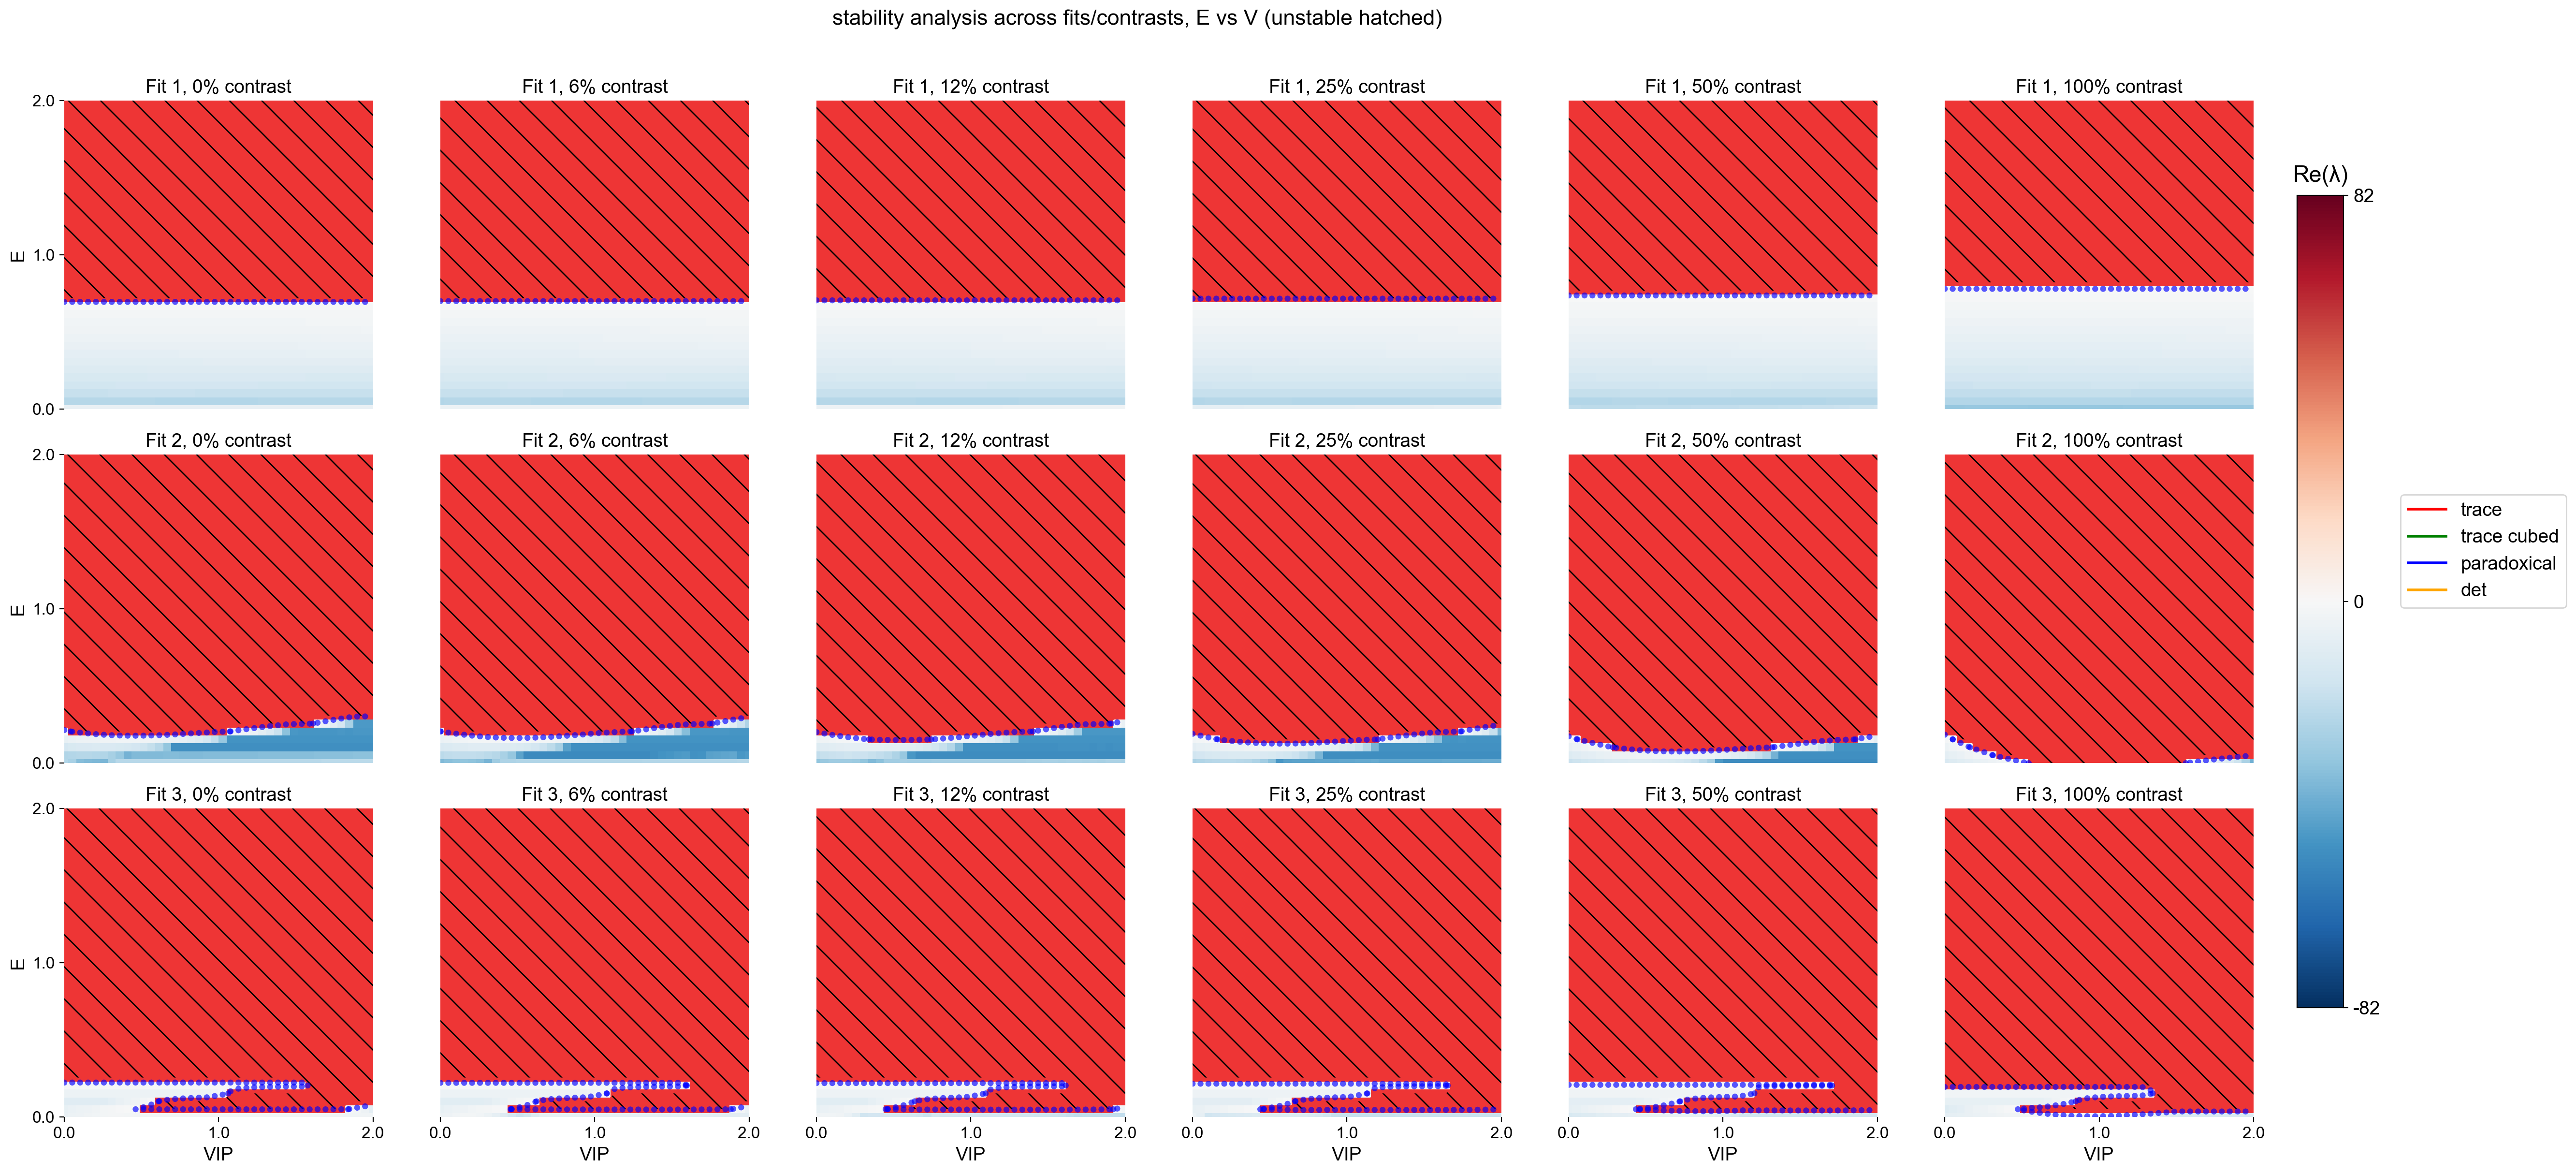

In [ ]:
# external input to two populations across fits/contrasts

top_k = 3
params_list, fits_list = get_params_fits_list(top_params, top_fits, c_range, top_k=top_k, random=False)
lims = [0,2]
points = 40
pop1 = 'E'
pop2 = 'V'
param_plot ='stability'
pop_plot = 'E'

fig, axes = plot_heatmap_grid_any(params_list, fits_list, c_range, lims, points, TAU, pop1, pop2, 
                                  sigma_noise, tau_noise, variable, noise_type, 
                                  param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:1126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.93])


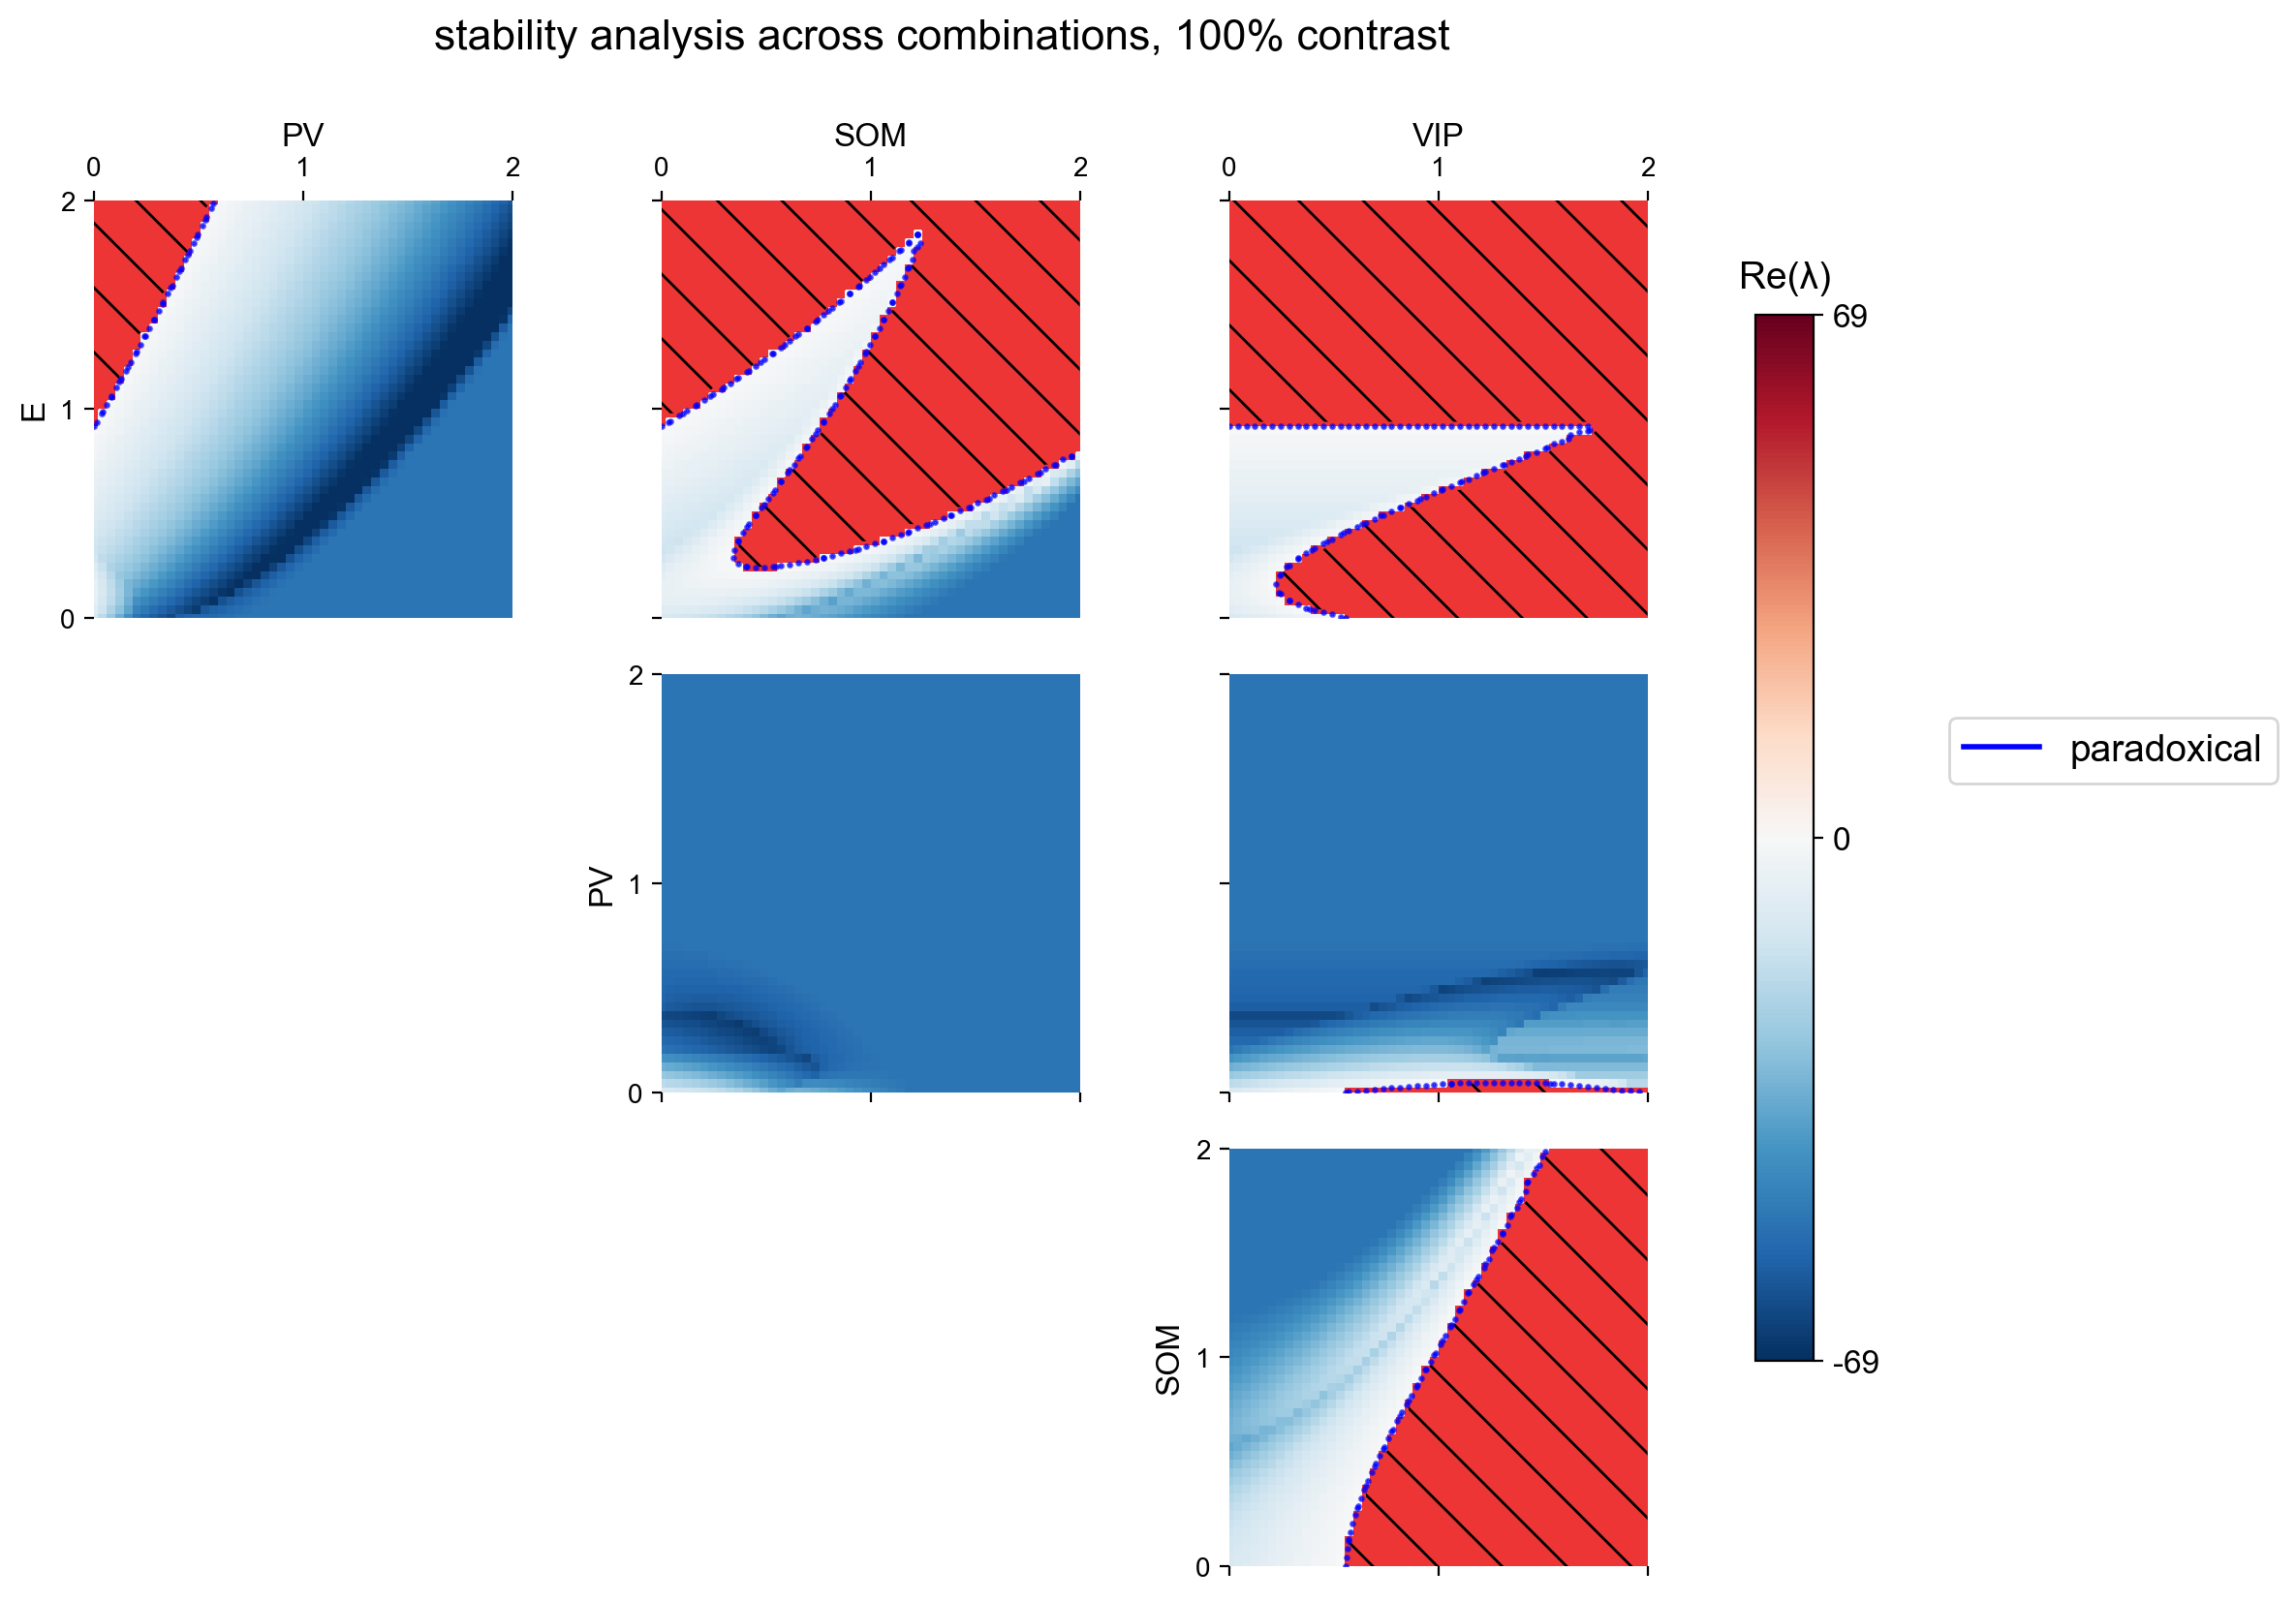

In [128]:
# combinations of external inputs to two populations for single fit/contrast

contrast = 1
lims = [0,2]
points = 50
param_plot ='stability'
pop_plot = 'E'

fig = plot_heatmap_combinations_any(fit_c, params, contrast, lims, points, TAU, 
                          sigma_noise, tau_noise, variable, noise_type, k,
                          param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


### rate analysis

/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite


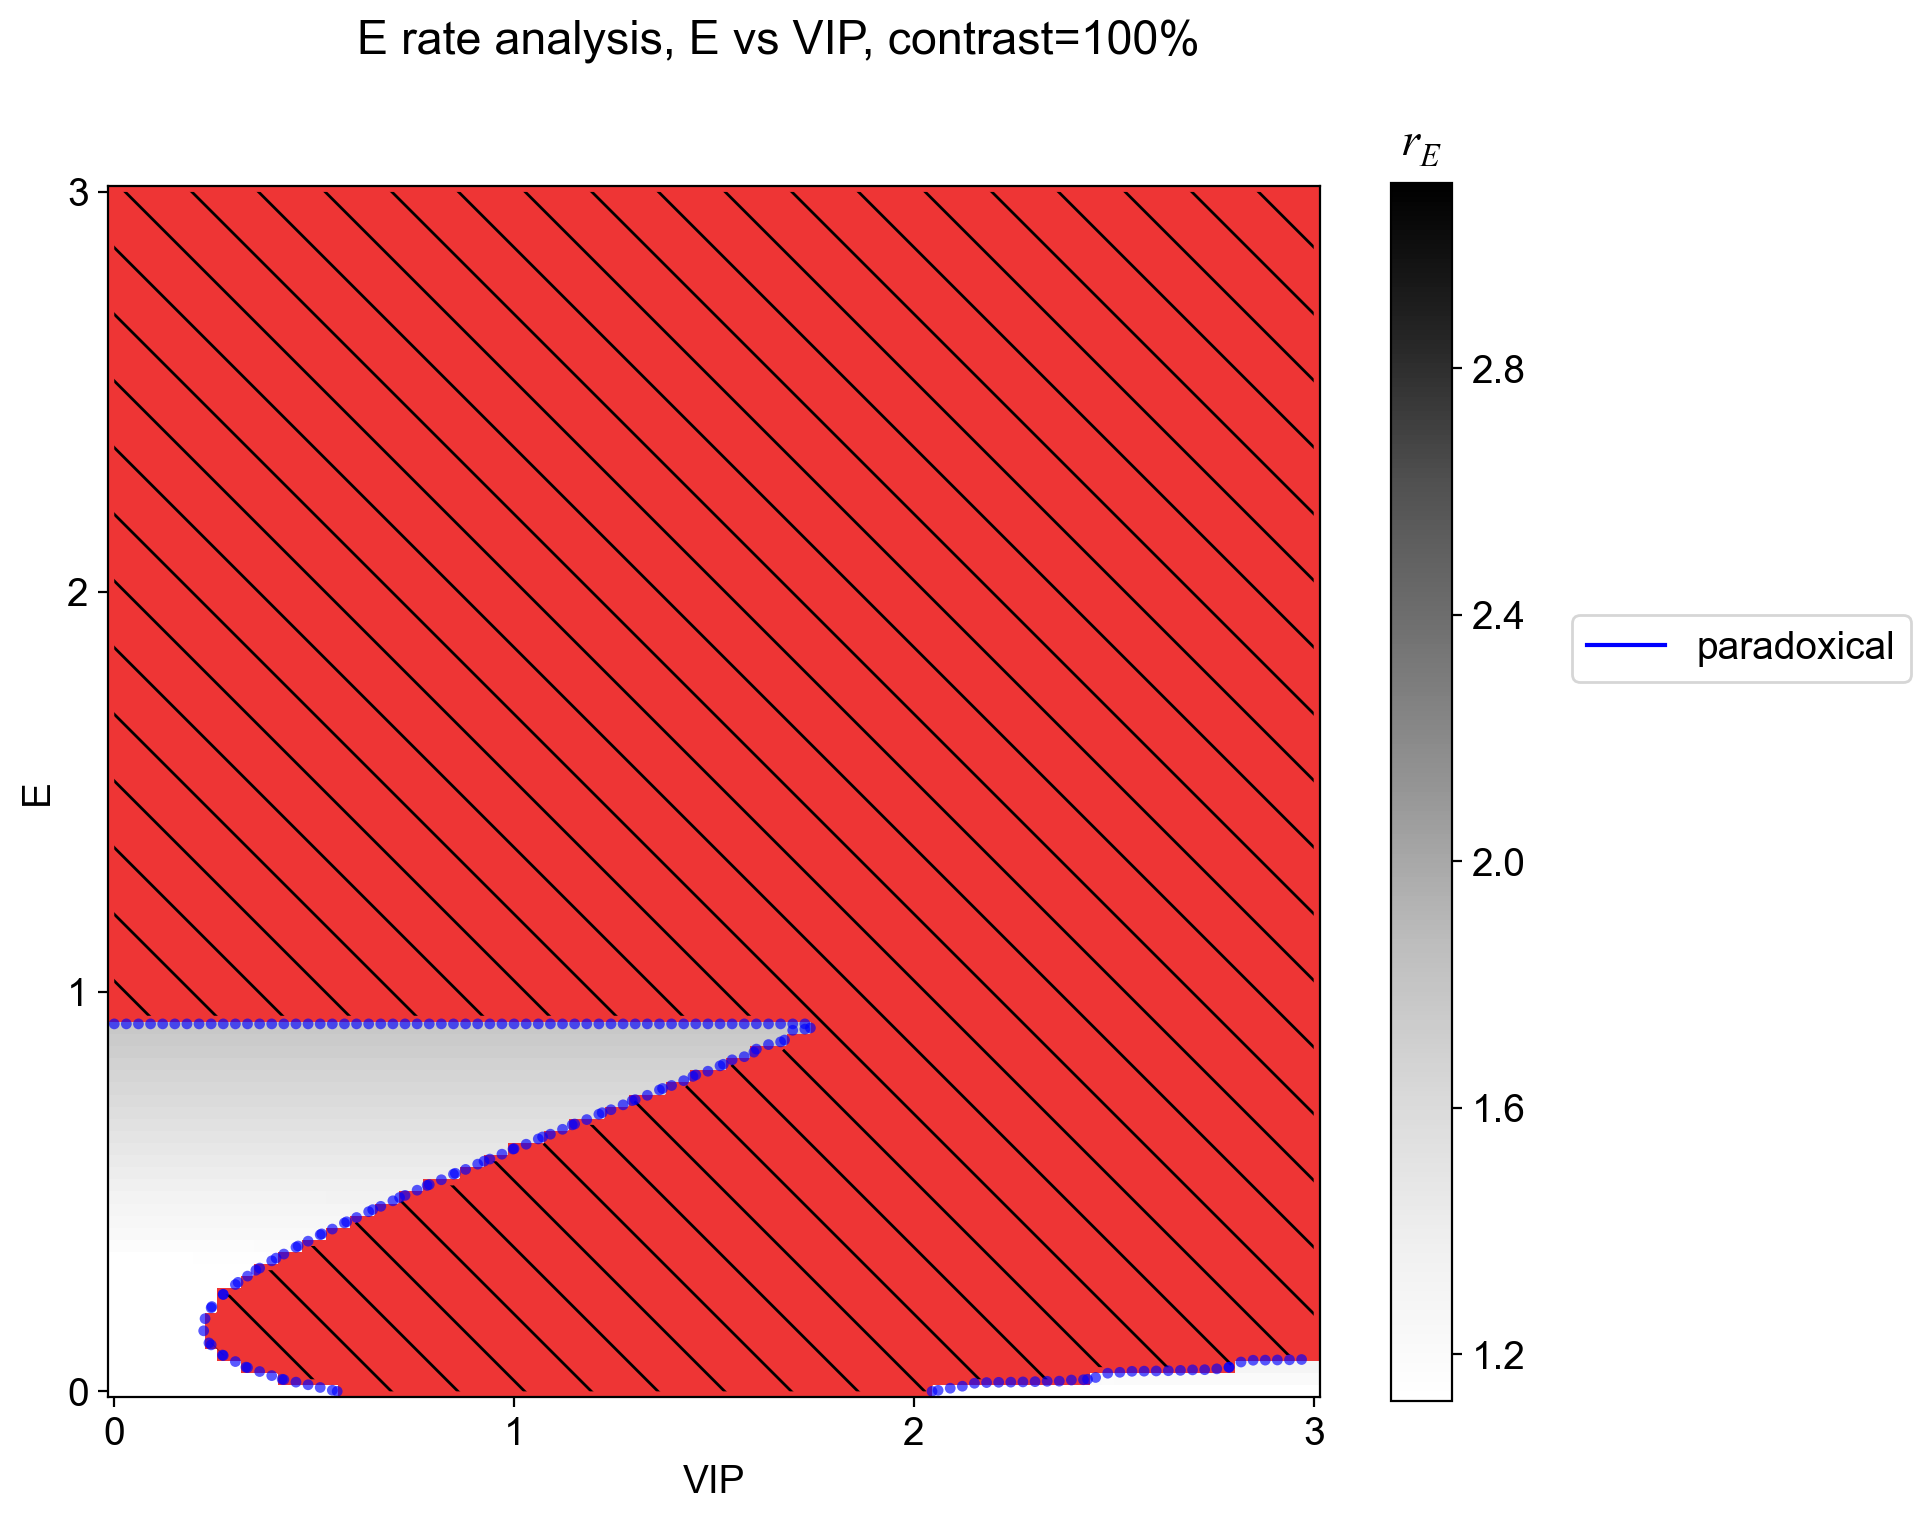

In [129]:
# external input to two populations for single fit/contrast

lims = [0,3]
points = 100
pop1 = 'E'
pop2 = 'V'
param_plot ='rate'
pop_plot = 'E'

fig = plot_single_heatmap_any(fit_c, params, lims, points, pop1, pop2, contrast,
                 sigma_noise, TAU, tau_noise, variable, noise_type, k,
                 param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:688: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


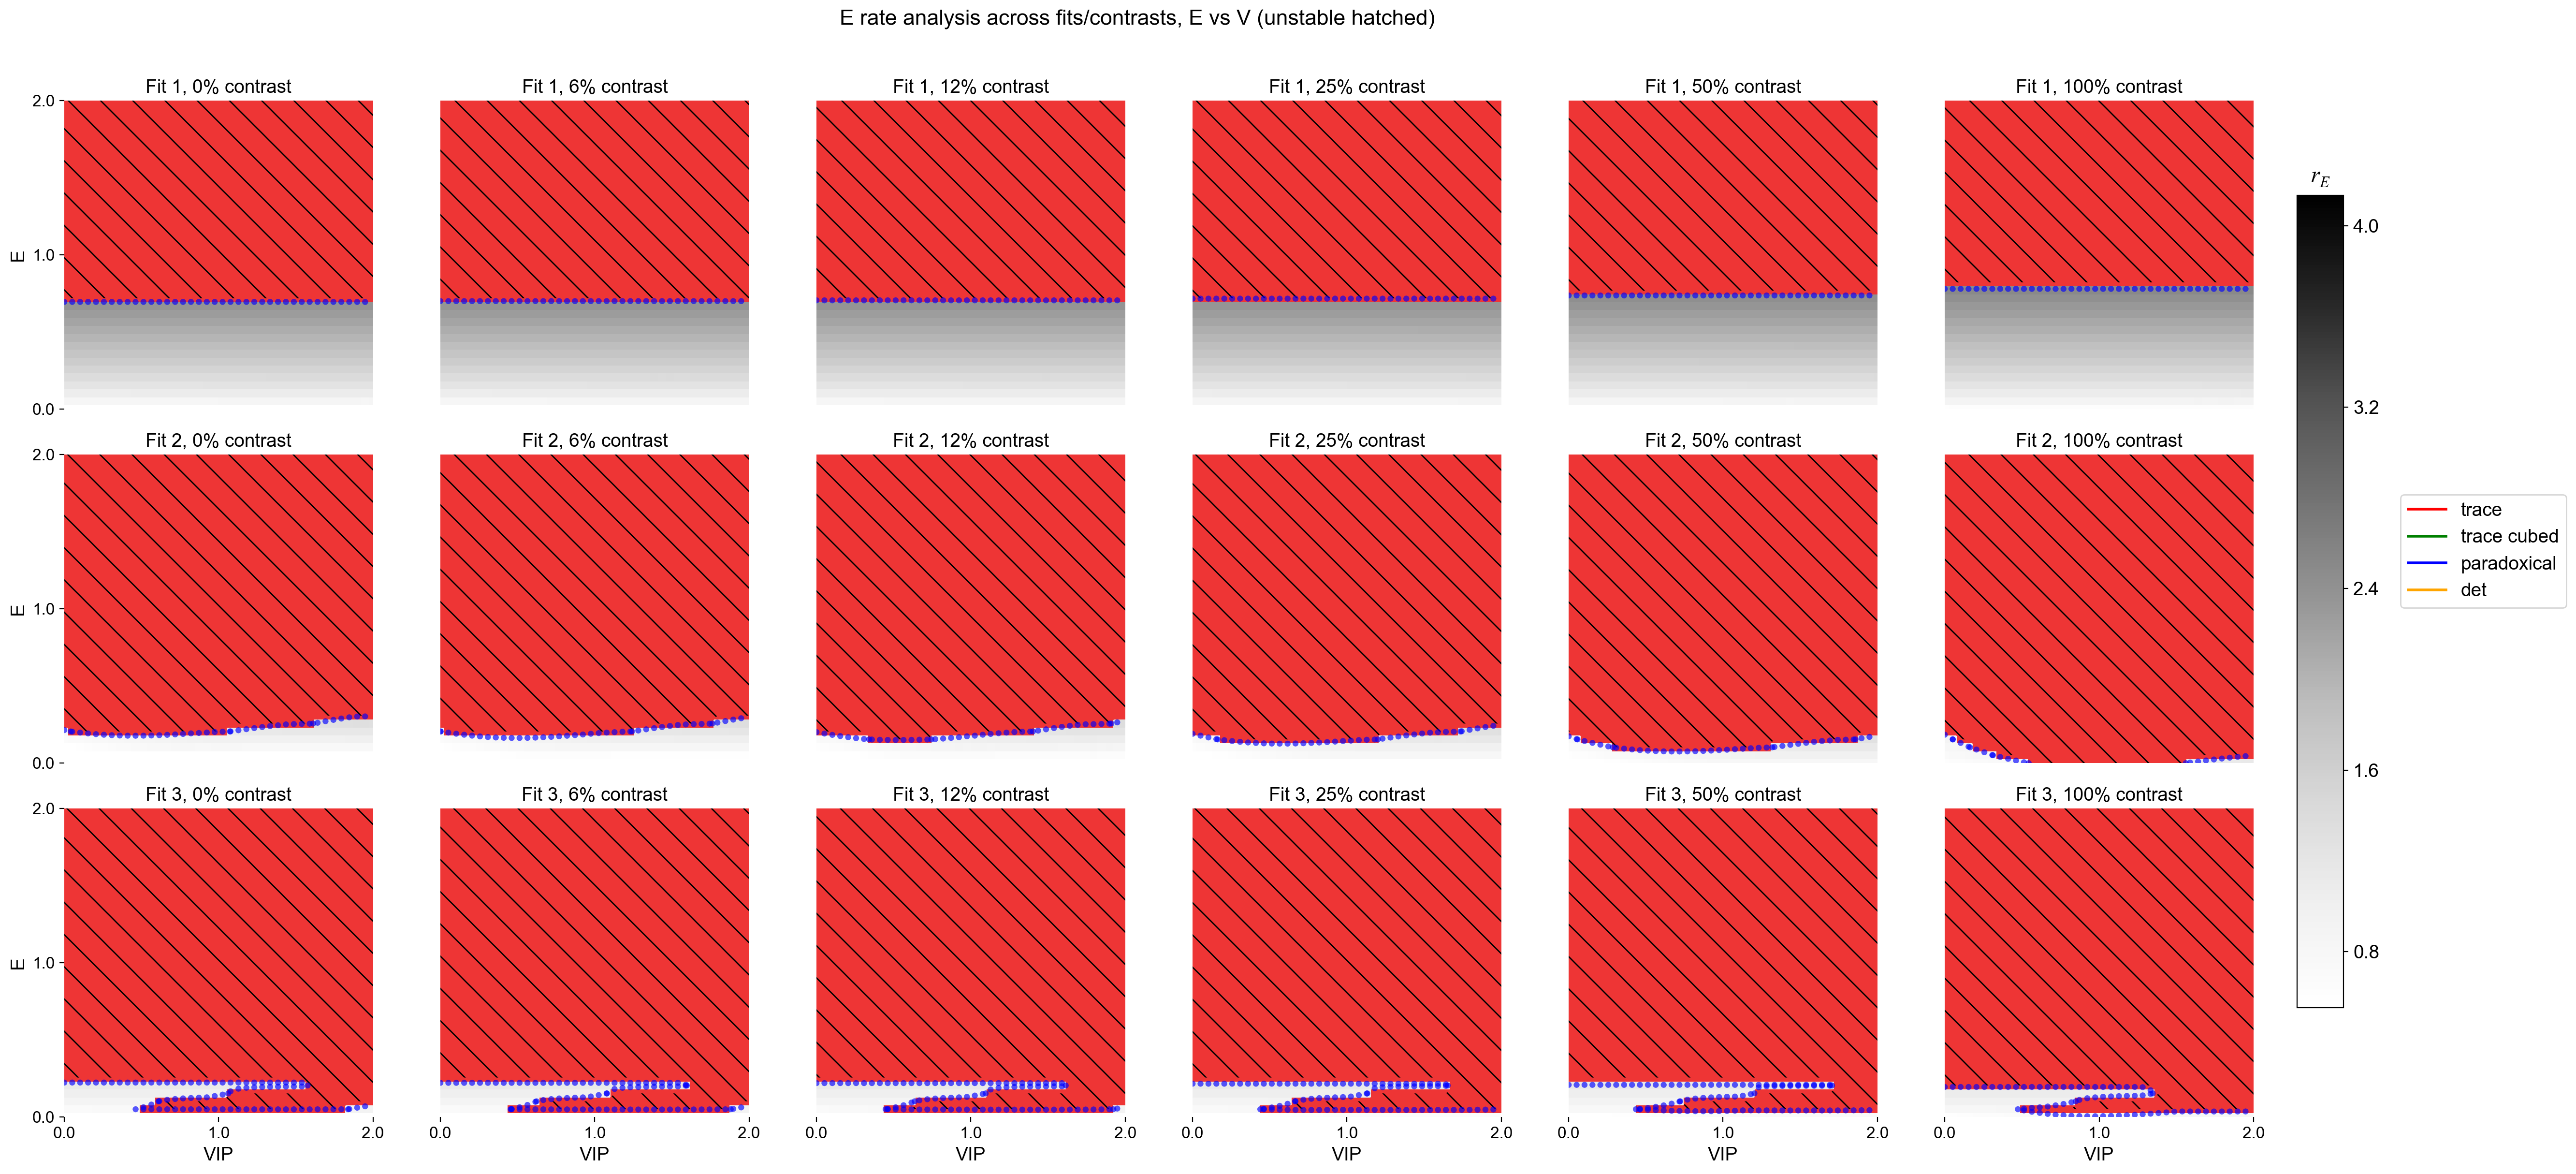

In [130]:
# external input to two populations across fits/contrasts

top_k = 3
params_list, fits_list = get_params_fits_list(top_params, top_fits, c_range, top_k=top_k, random=False)
lims = [0,2]
points = 40
pop1 = 'E'
pop2 = 'V'
param_plot ='rate'
pop_plot = 'E'

fig, axes = plot_heatmap_grid_any(params_list, fits_list, c_range, lims, points, TAU, pop1, pop2, 
                                  sigma_noise, tau_noise, variable, noise_type, 
                                  param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:1126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.93])


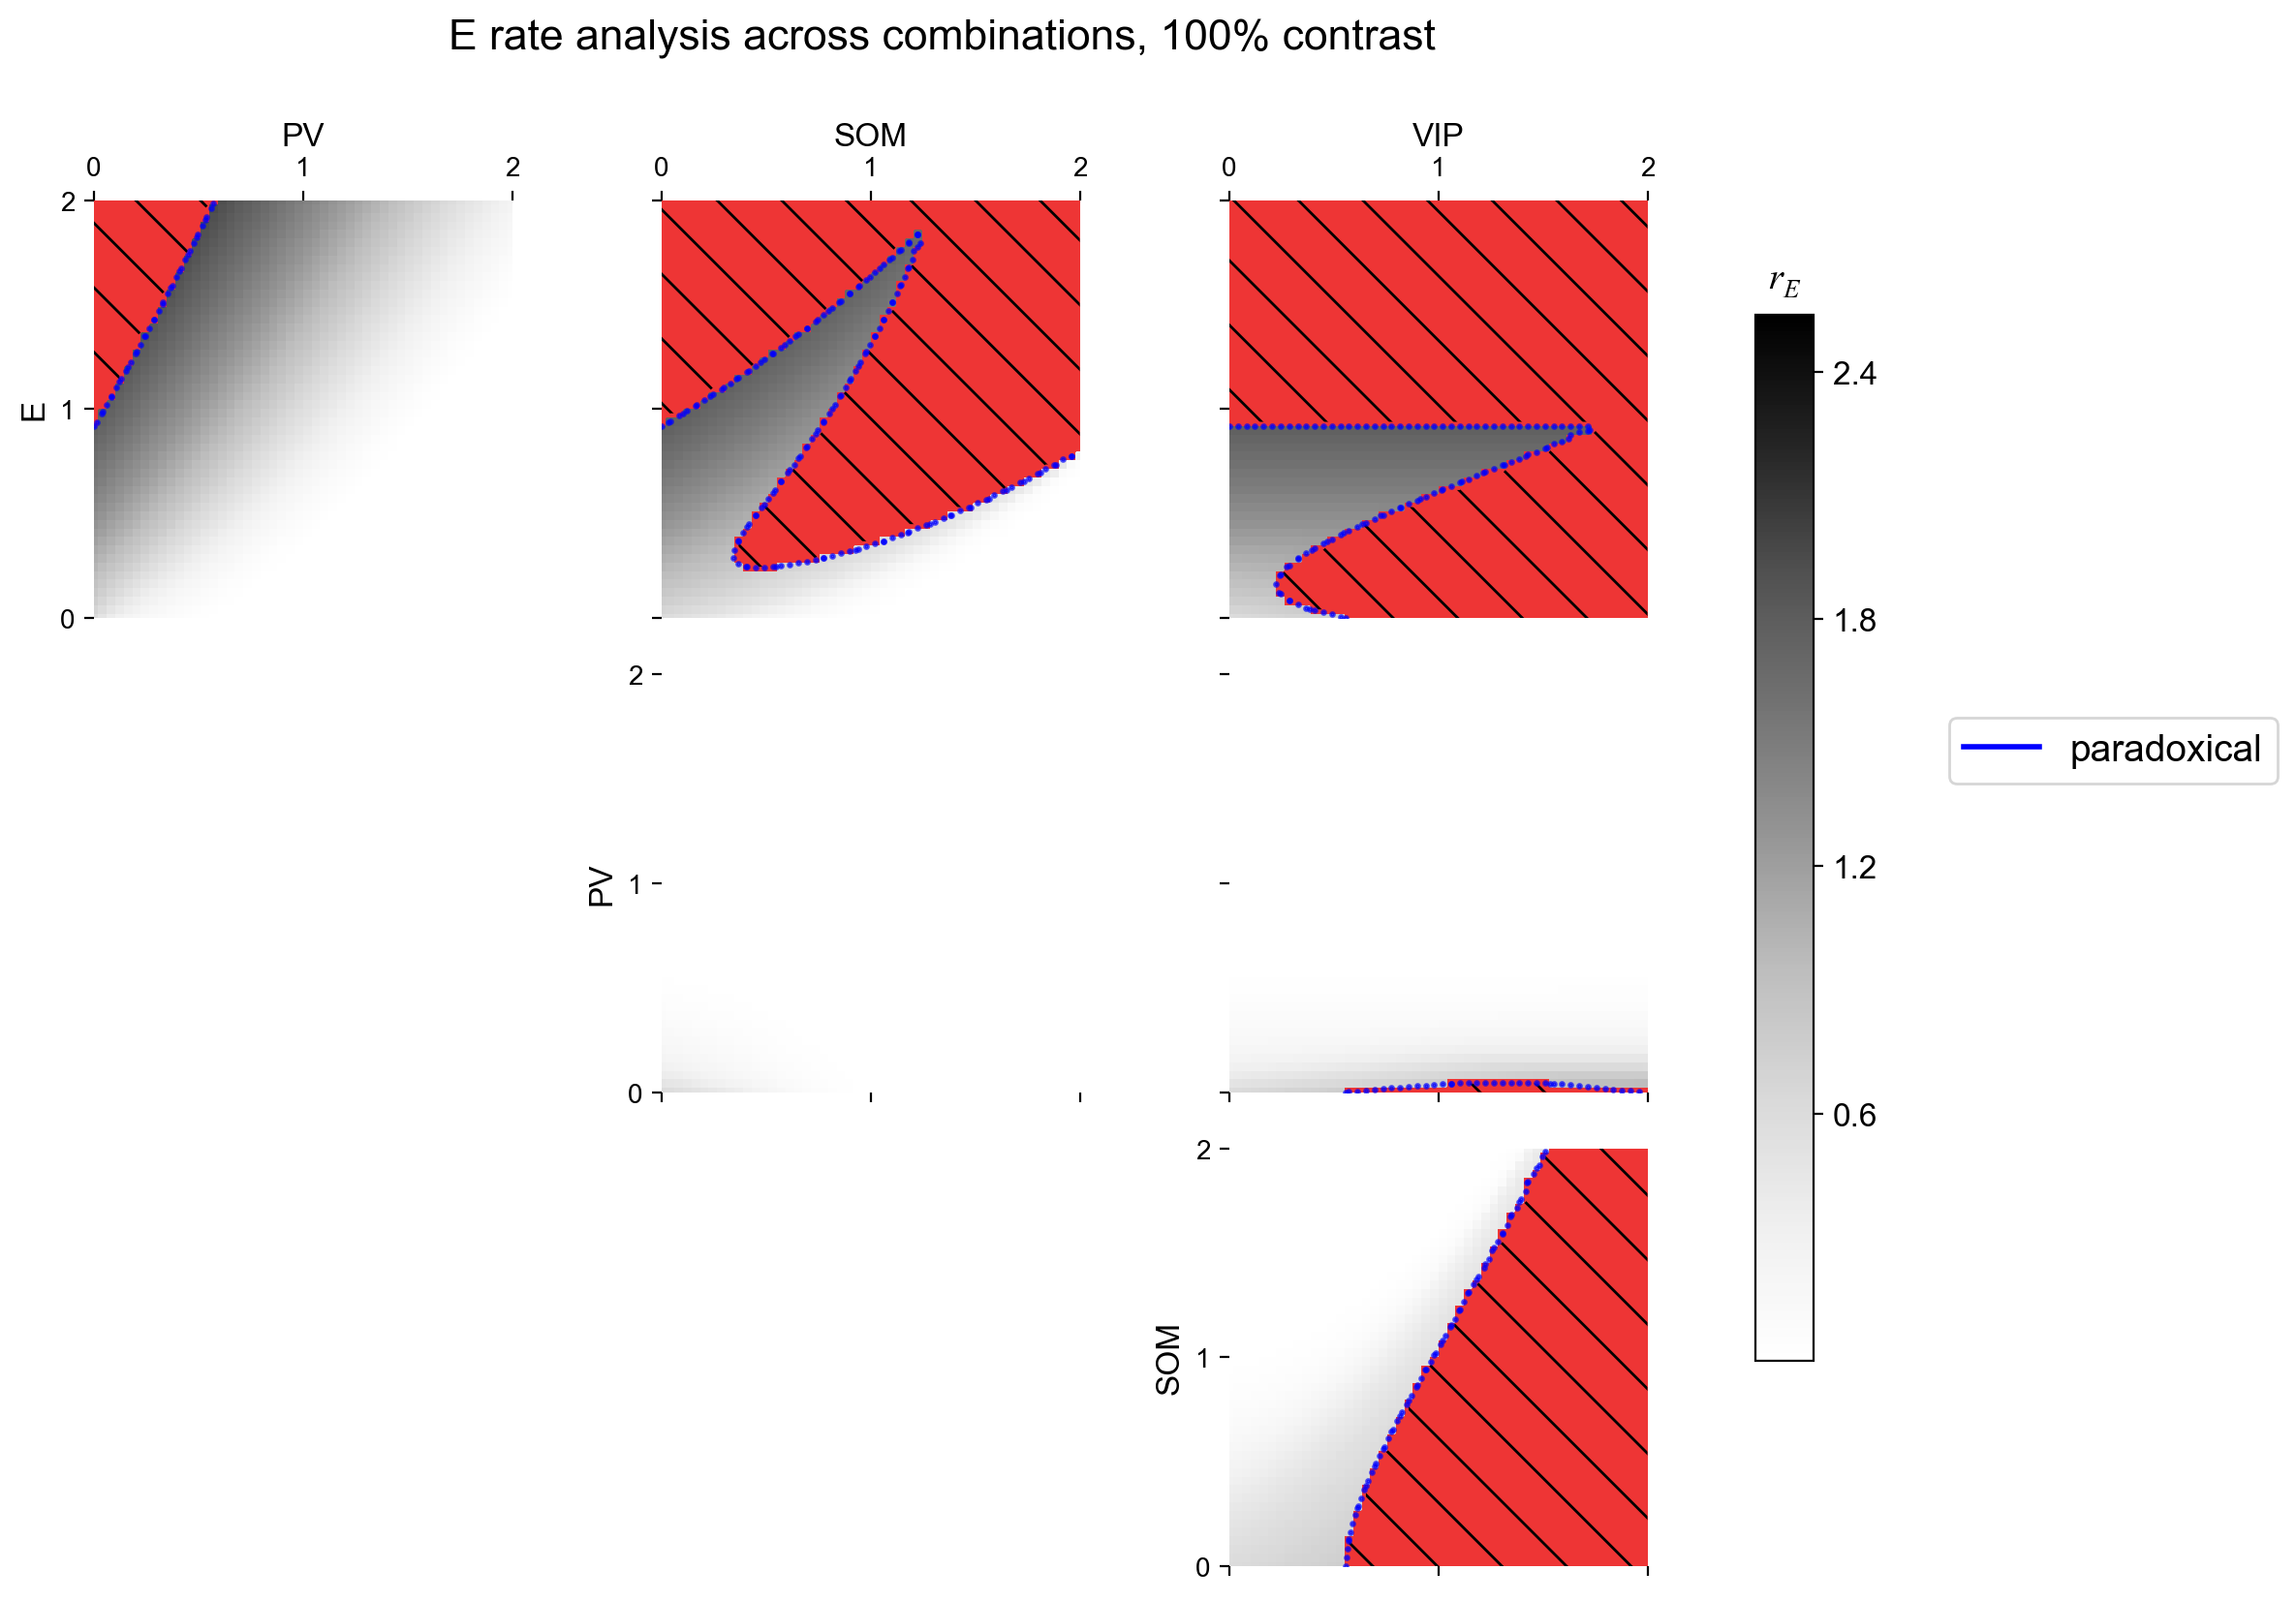

In [ ]:
# combinations of external inputs to two populations for single fit/contrast

lims = [0,2]
points = 50
param_plot ='rate'
pop_plot = 'E'

fig = plot_heatmap_combinations_any(fit_c, params, contrast, lims, points, TAU, 
                          sigma_noise, tau_noise, variable, noise_type, k,
                          param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


### gain analysis

/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite


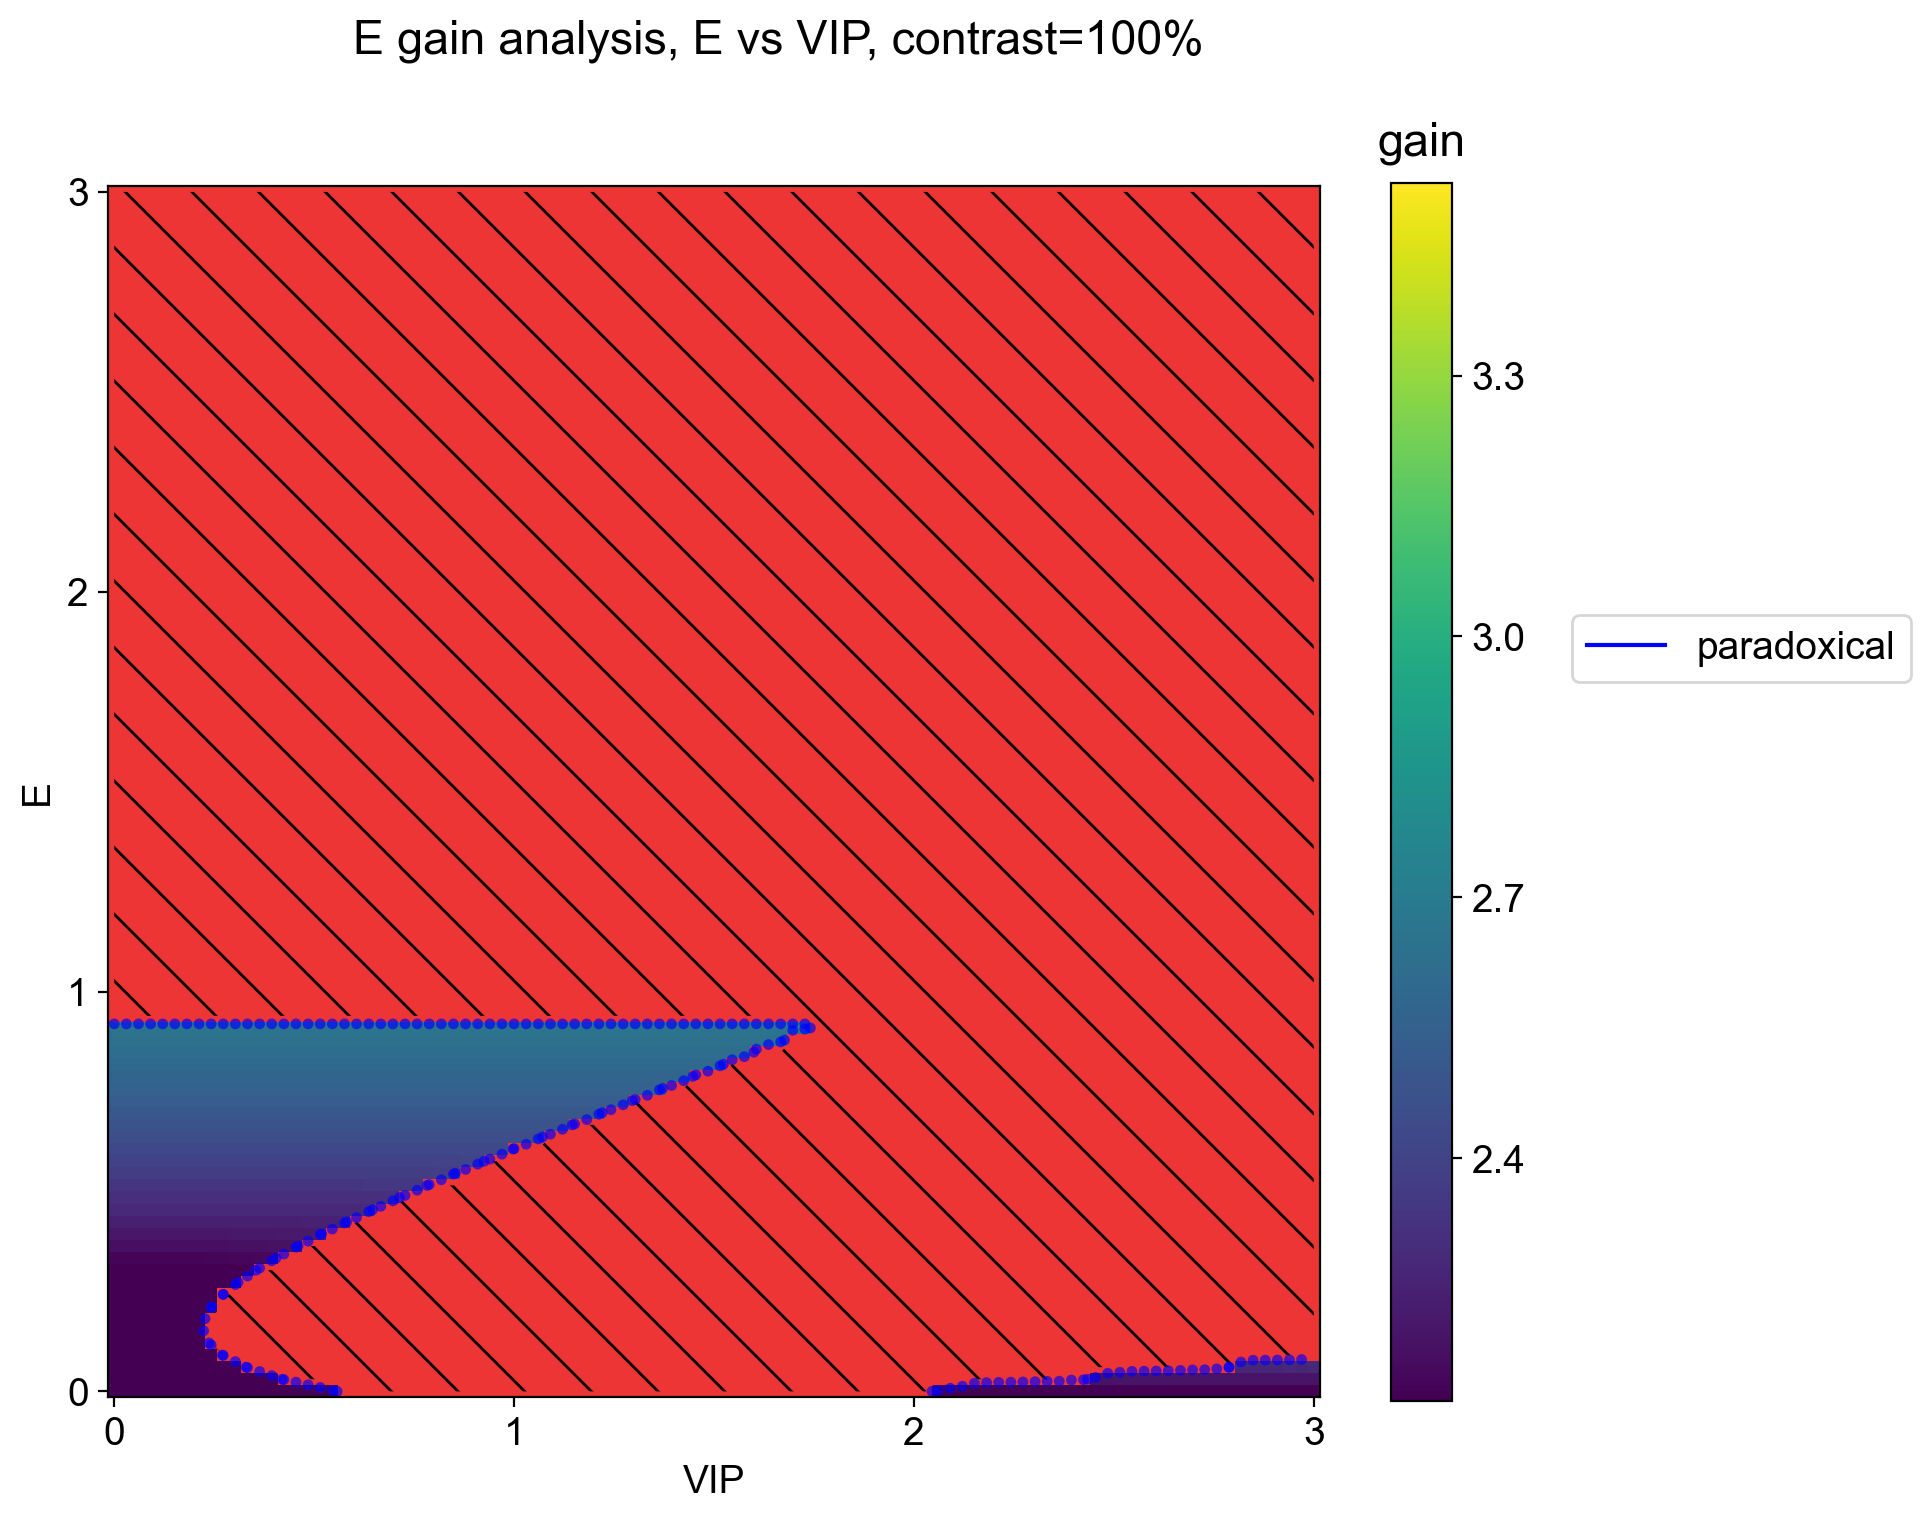

In [132]:
# external input to two populations for single fit/contrast

lims = [0,3]
points = 100
pop1 = 'E'
pop2 = 'V'
param_plot ='gain'
pop_plot = 'E'

fig = plot_single_heatmap_any(fit_c, params, lims, points, pop1, pop2, contrast,
                 sigma_noise, TAU, tau_noise, variable, noise_type, k,
                 param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:688: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


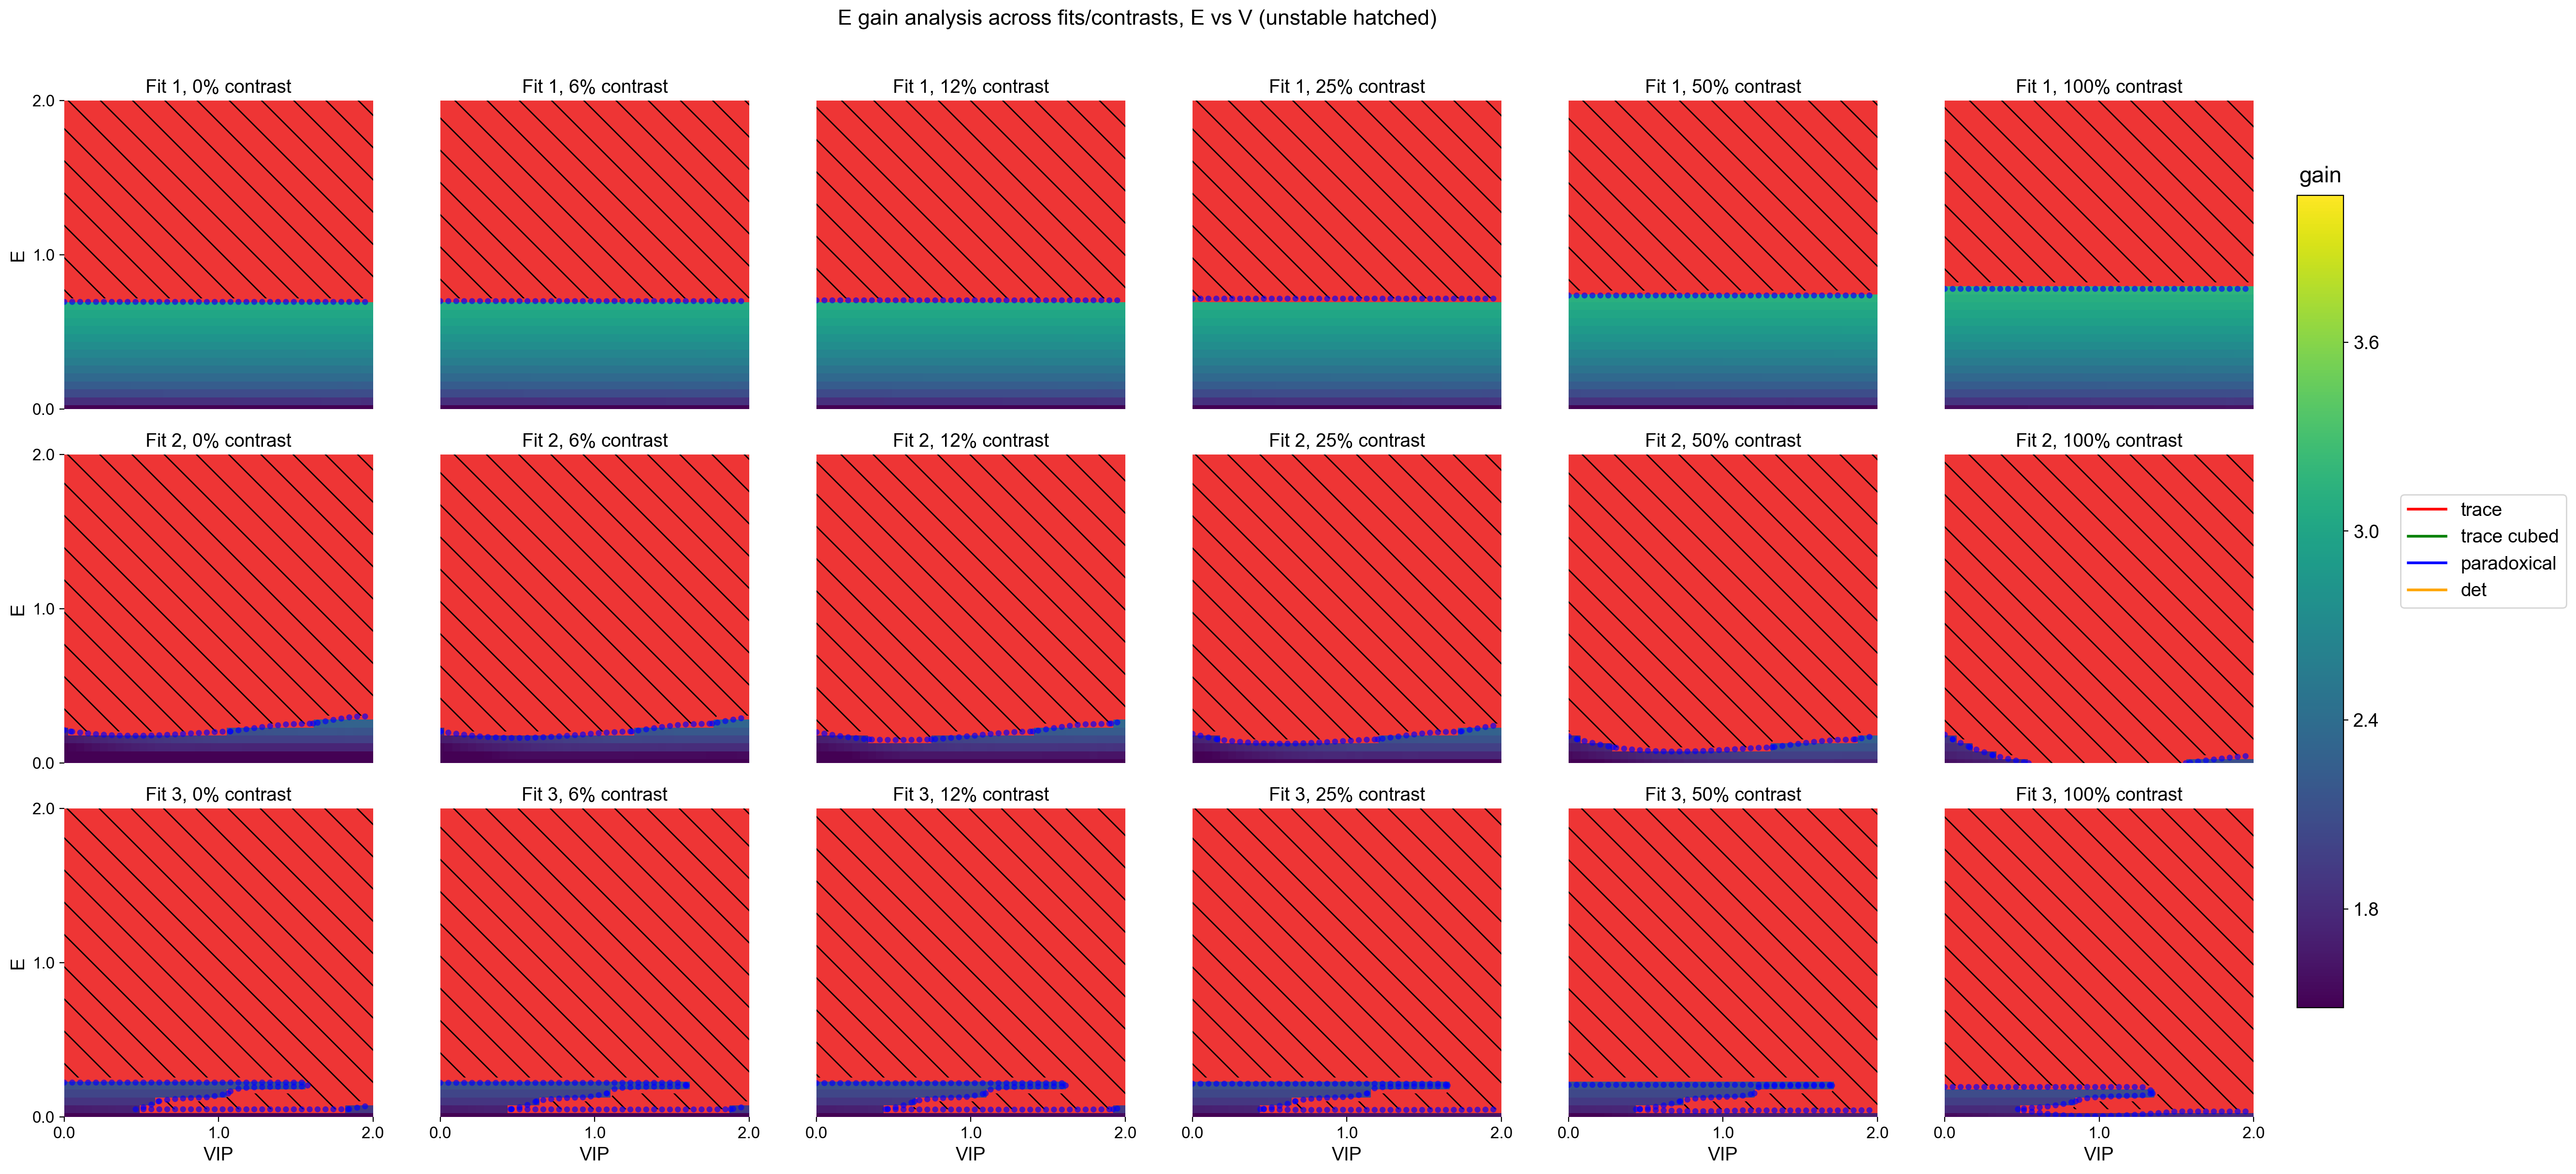

In [133]:
# external input to two populations across fits/contrasts

top_k = 3
params_list, fits_list = get_params_fits_list(top_params, top_fits, c_range, top_k=top_k, random=False)
lims = [0,2]
points = 40
pop1 = 'E' # E
pop2 = 'V'
param_plot ='gain'
pop_plot = 'E'

fig, axes = plot_heatmap_grid_any(params_list, fits_list, c_range, lims, points, TAU, pop1, pop2, 
                                  sigma_noise, tau_noise, variable, noise_type, 
                                  param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:1126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.93])


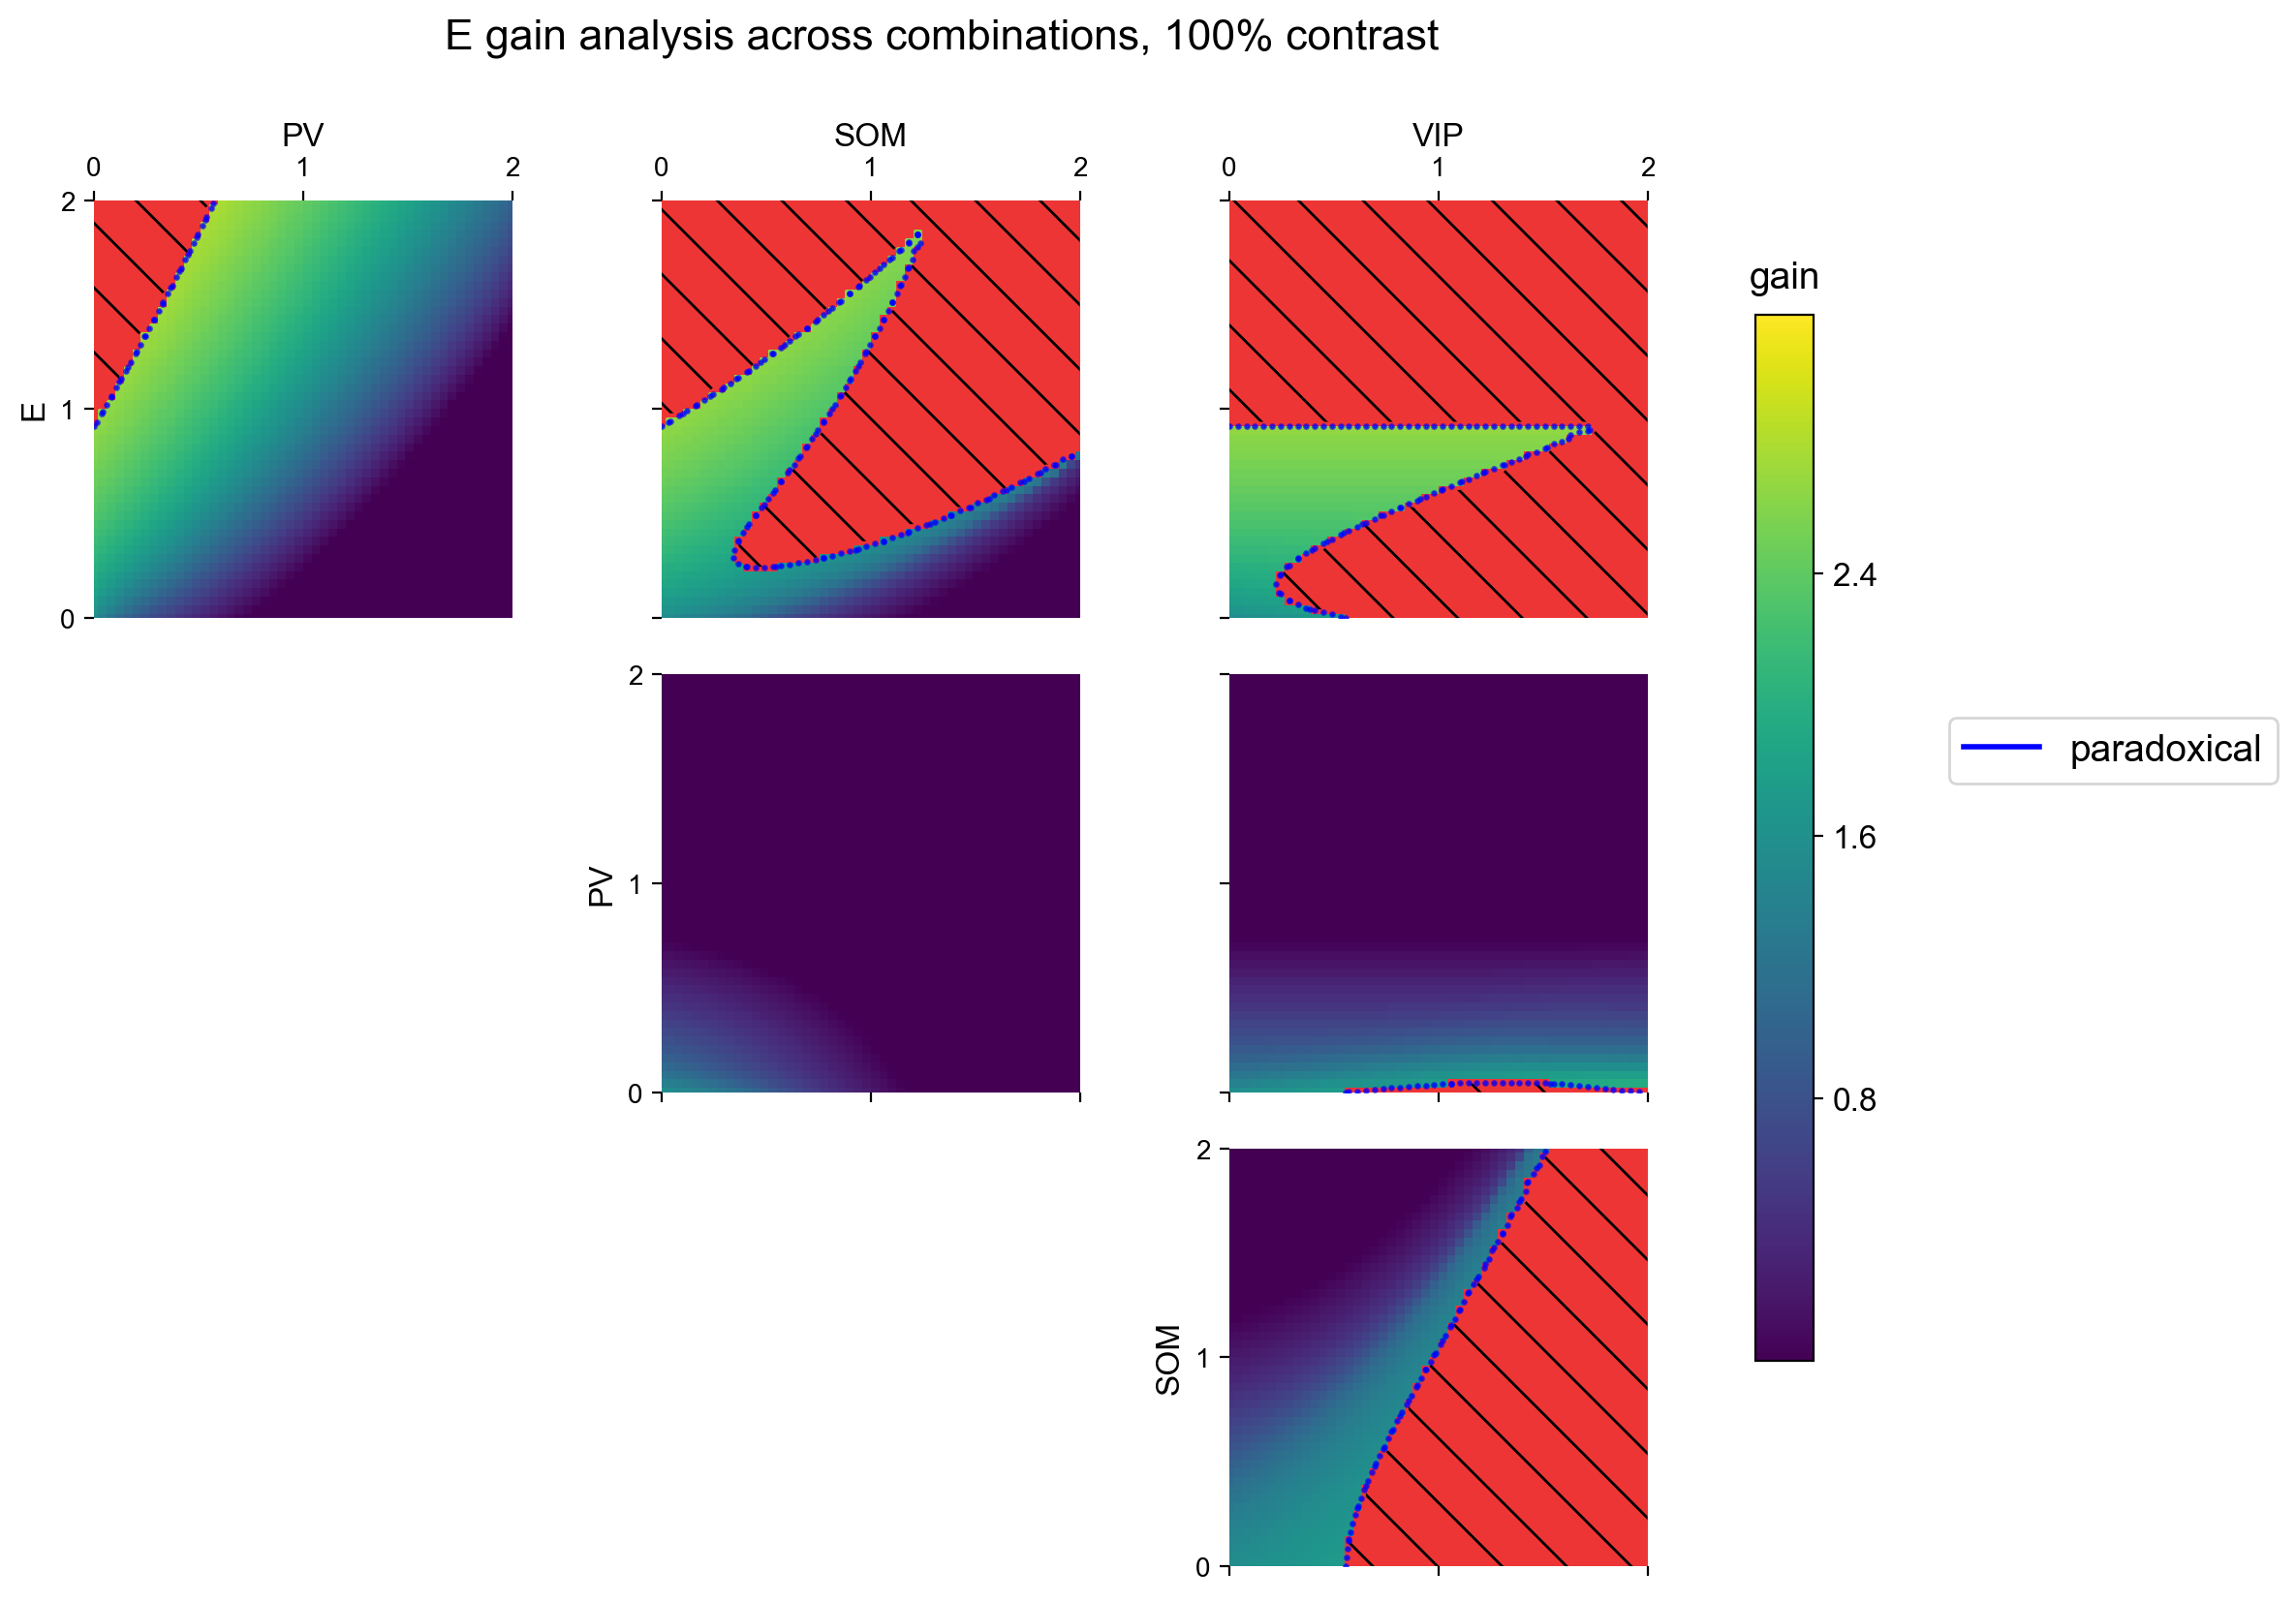

In [134]:
# combinations of external inputs to two populations for single fit/contrast

lims = [0,2]
points = 50
param_plot ='gain'
pop_plot = 'E'

fig = plot_heatmap_combinations_any(fit_c, params, contrast, lims, points, TAU, 
                          sigma_noise, tau_noise, variable, noise_type, k,
                          param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


### variance analysis

/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite


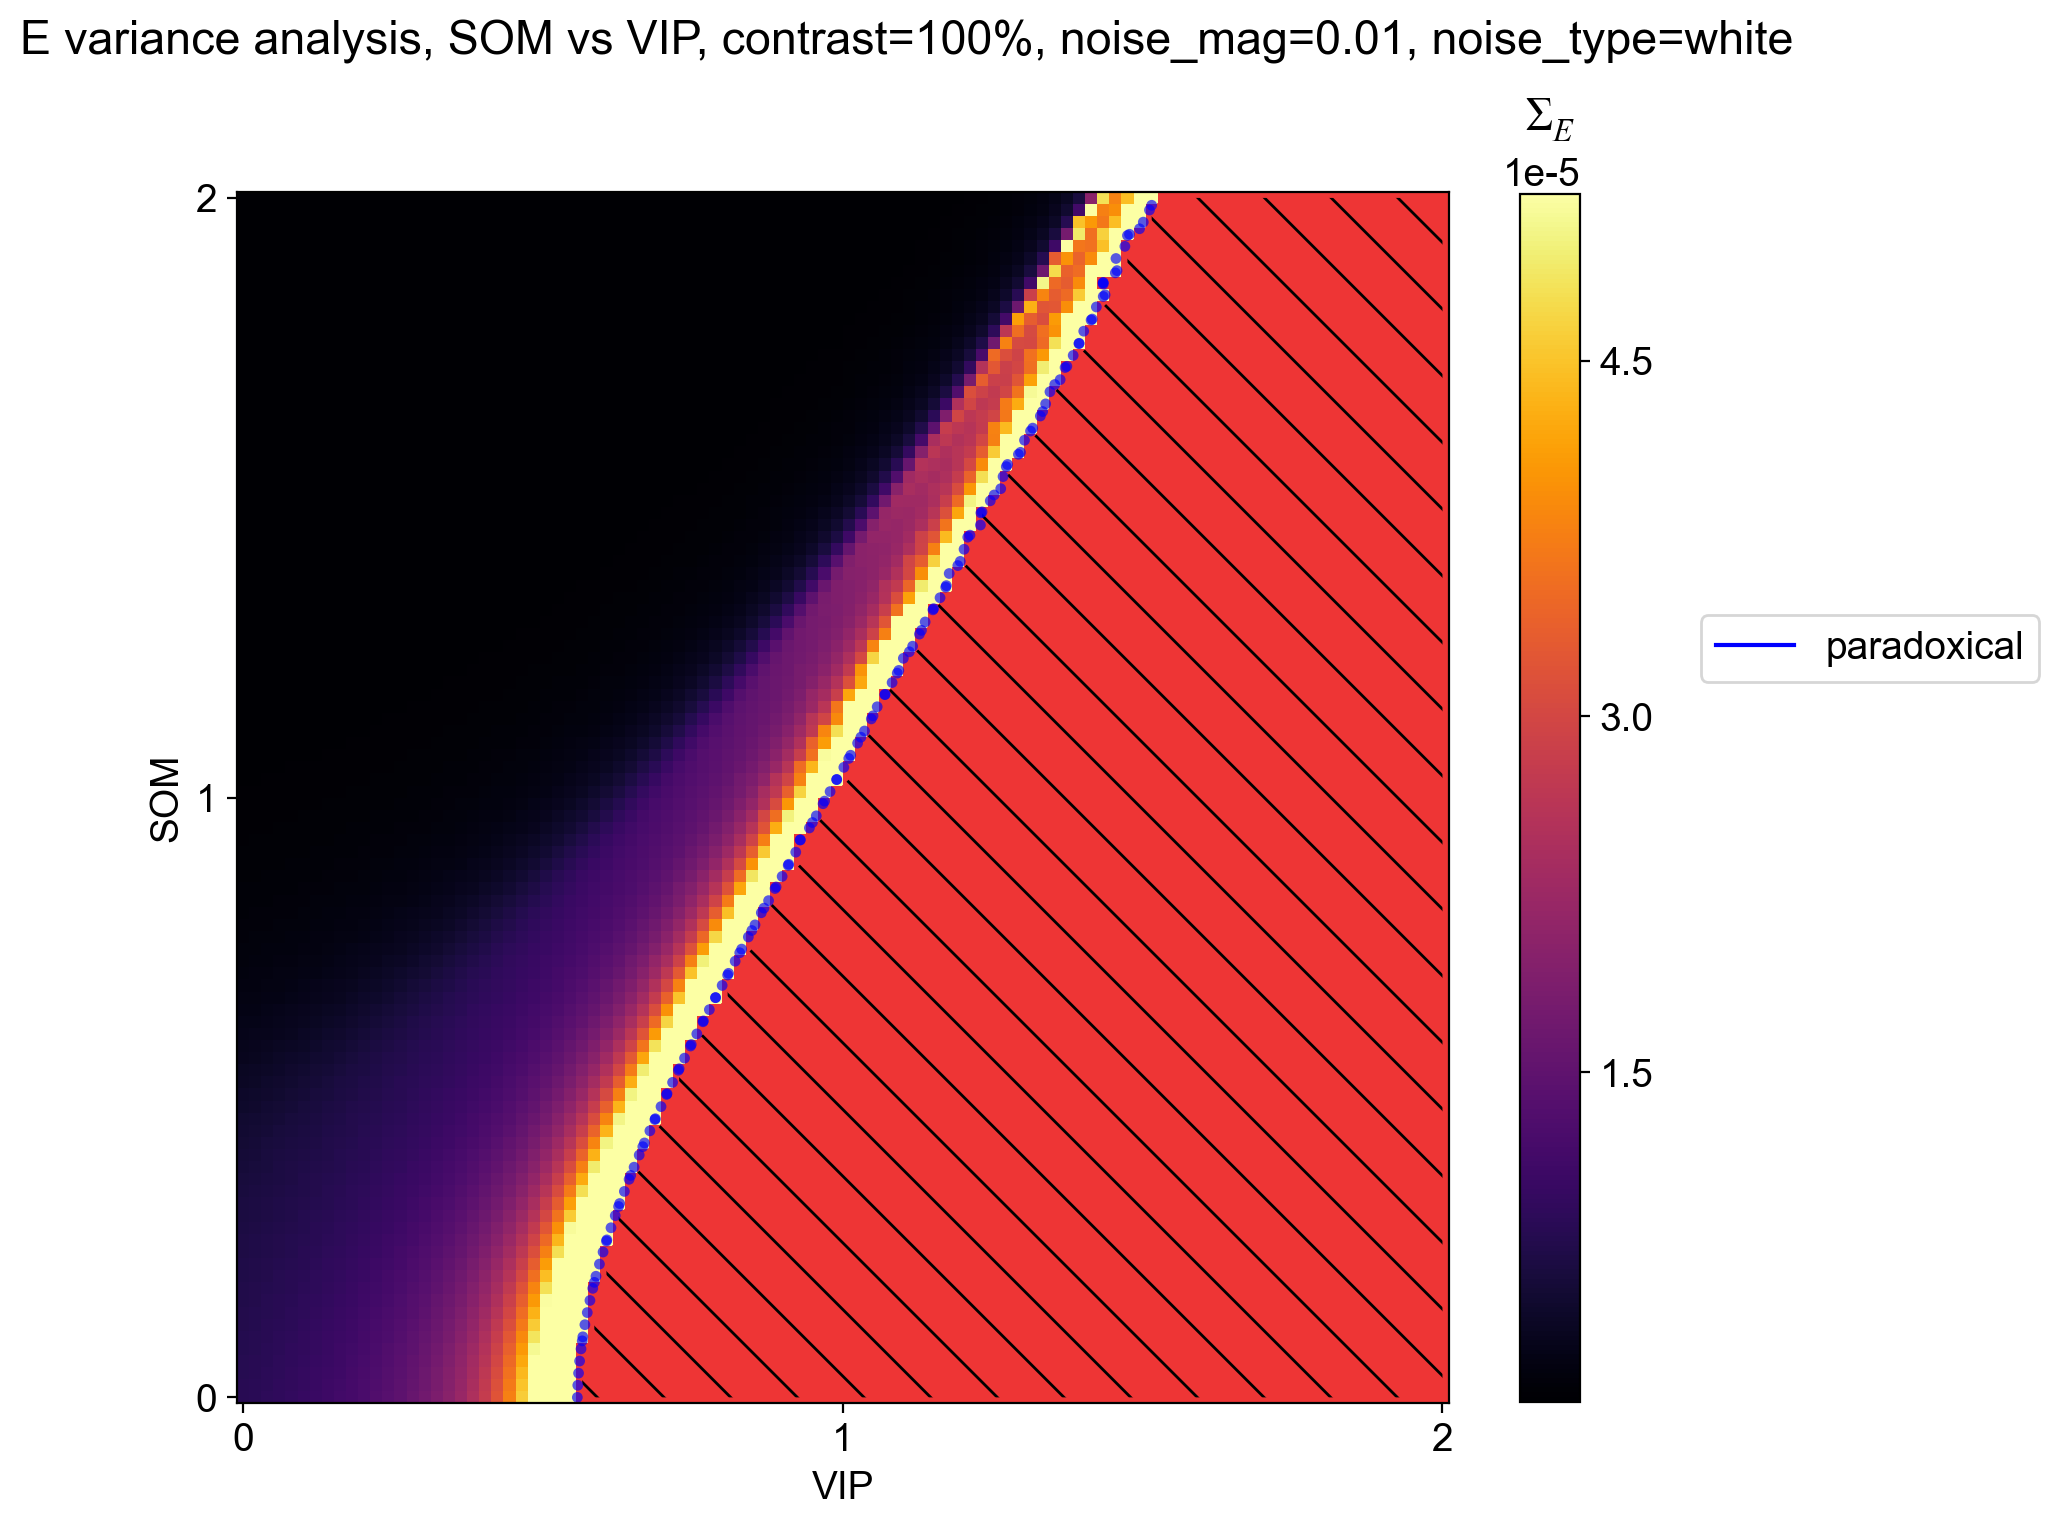

In [135]:
# external input to two populations for single fit/contrast

lims = [0,2]
points = 100
pop1 = 'S'
pop2 = 'V'
param_plot ='variance'
pop_plot = 'E'

fig = plot_single_heatmap_any(fit_c, params, lims, points, pop1, pop2, contrast,
                 sigma_noise, TAU, tau_noise, variable, noise_type, k,
                 param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:688: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


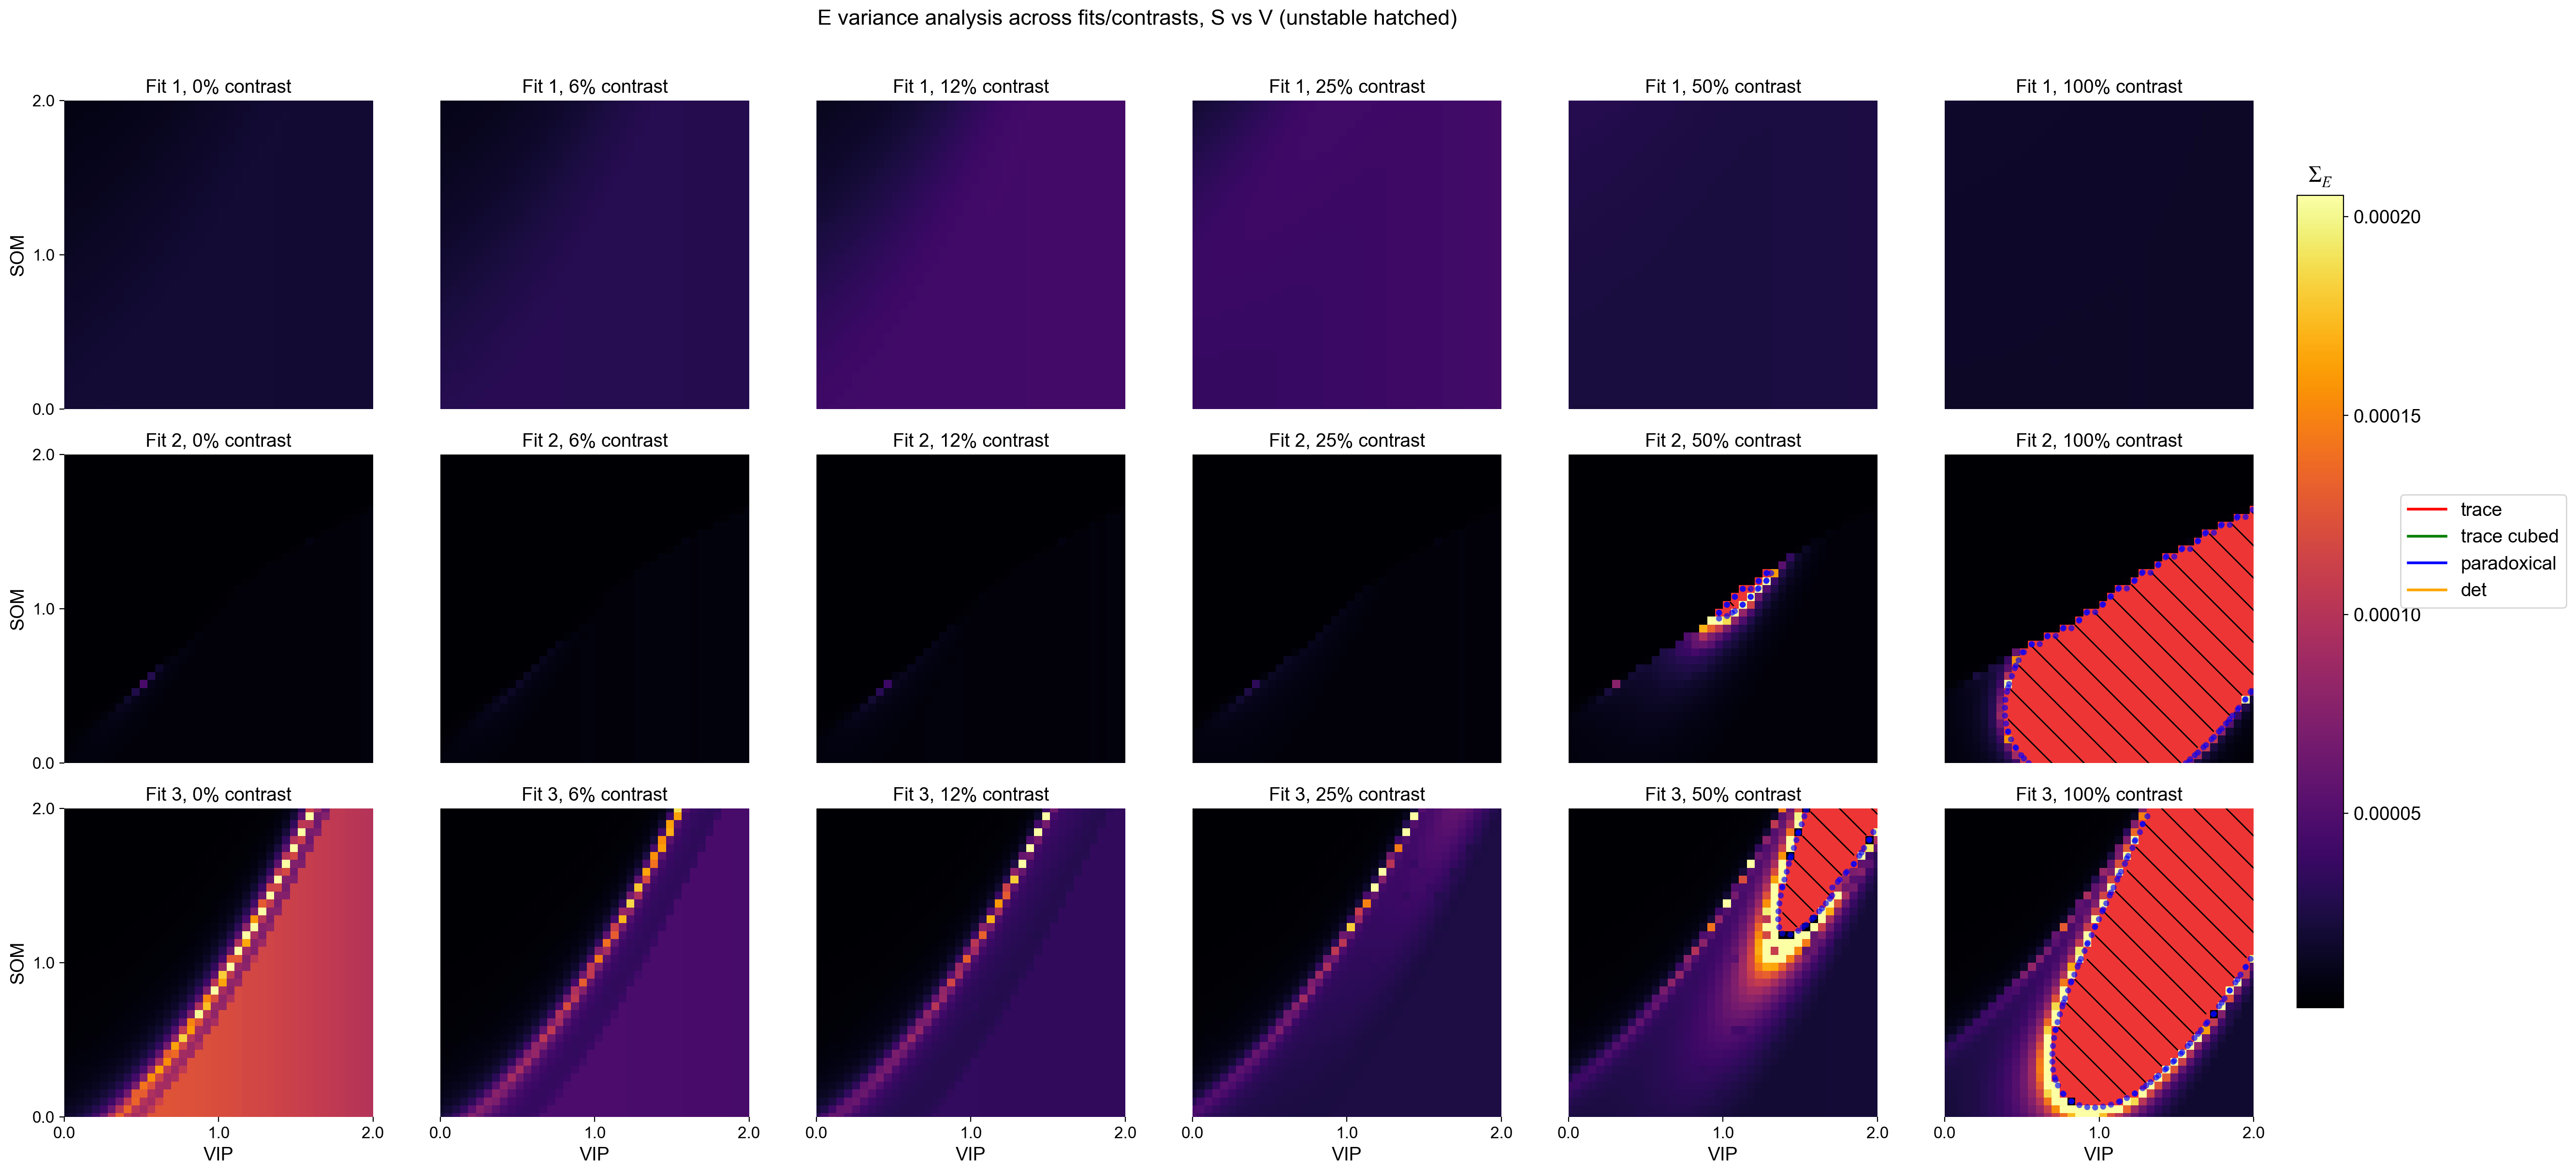

In [136]:
# external input to two populations across fits/contrasts

top_k = 3
params_list, fits_list = get_params_fits_list(top_params, top_fits, c_range, top_k=top_k, random=False)
lims = [0,2]
points = 40
pop1 = 'S'
pop2 = 'V'
param_plot ='variance'
pop_plot = 'E'

fig, axes = plot_heatmap_grid_any(params_list, fits_list, c_range, lims, points, TAU, pop1, pop2, 
                                  sigma_noise, tau_noise, variable, noise_type, 
                                  param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:1126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.93])


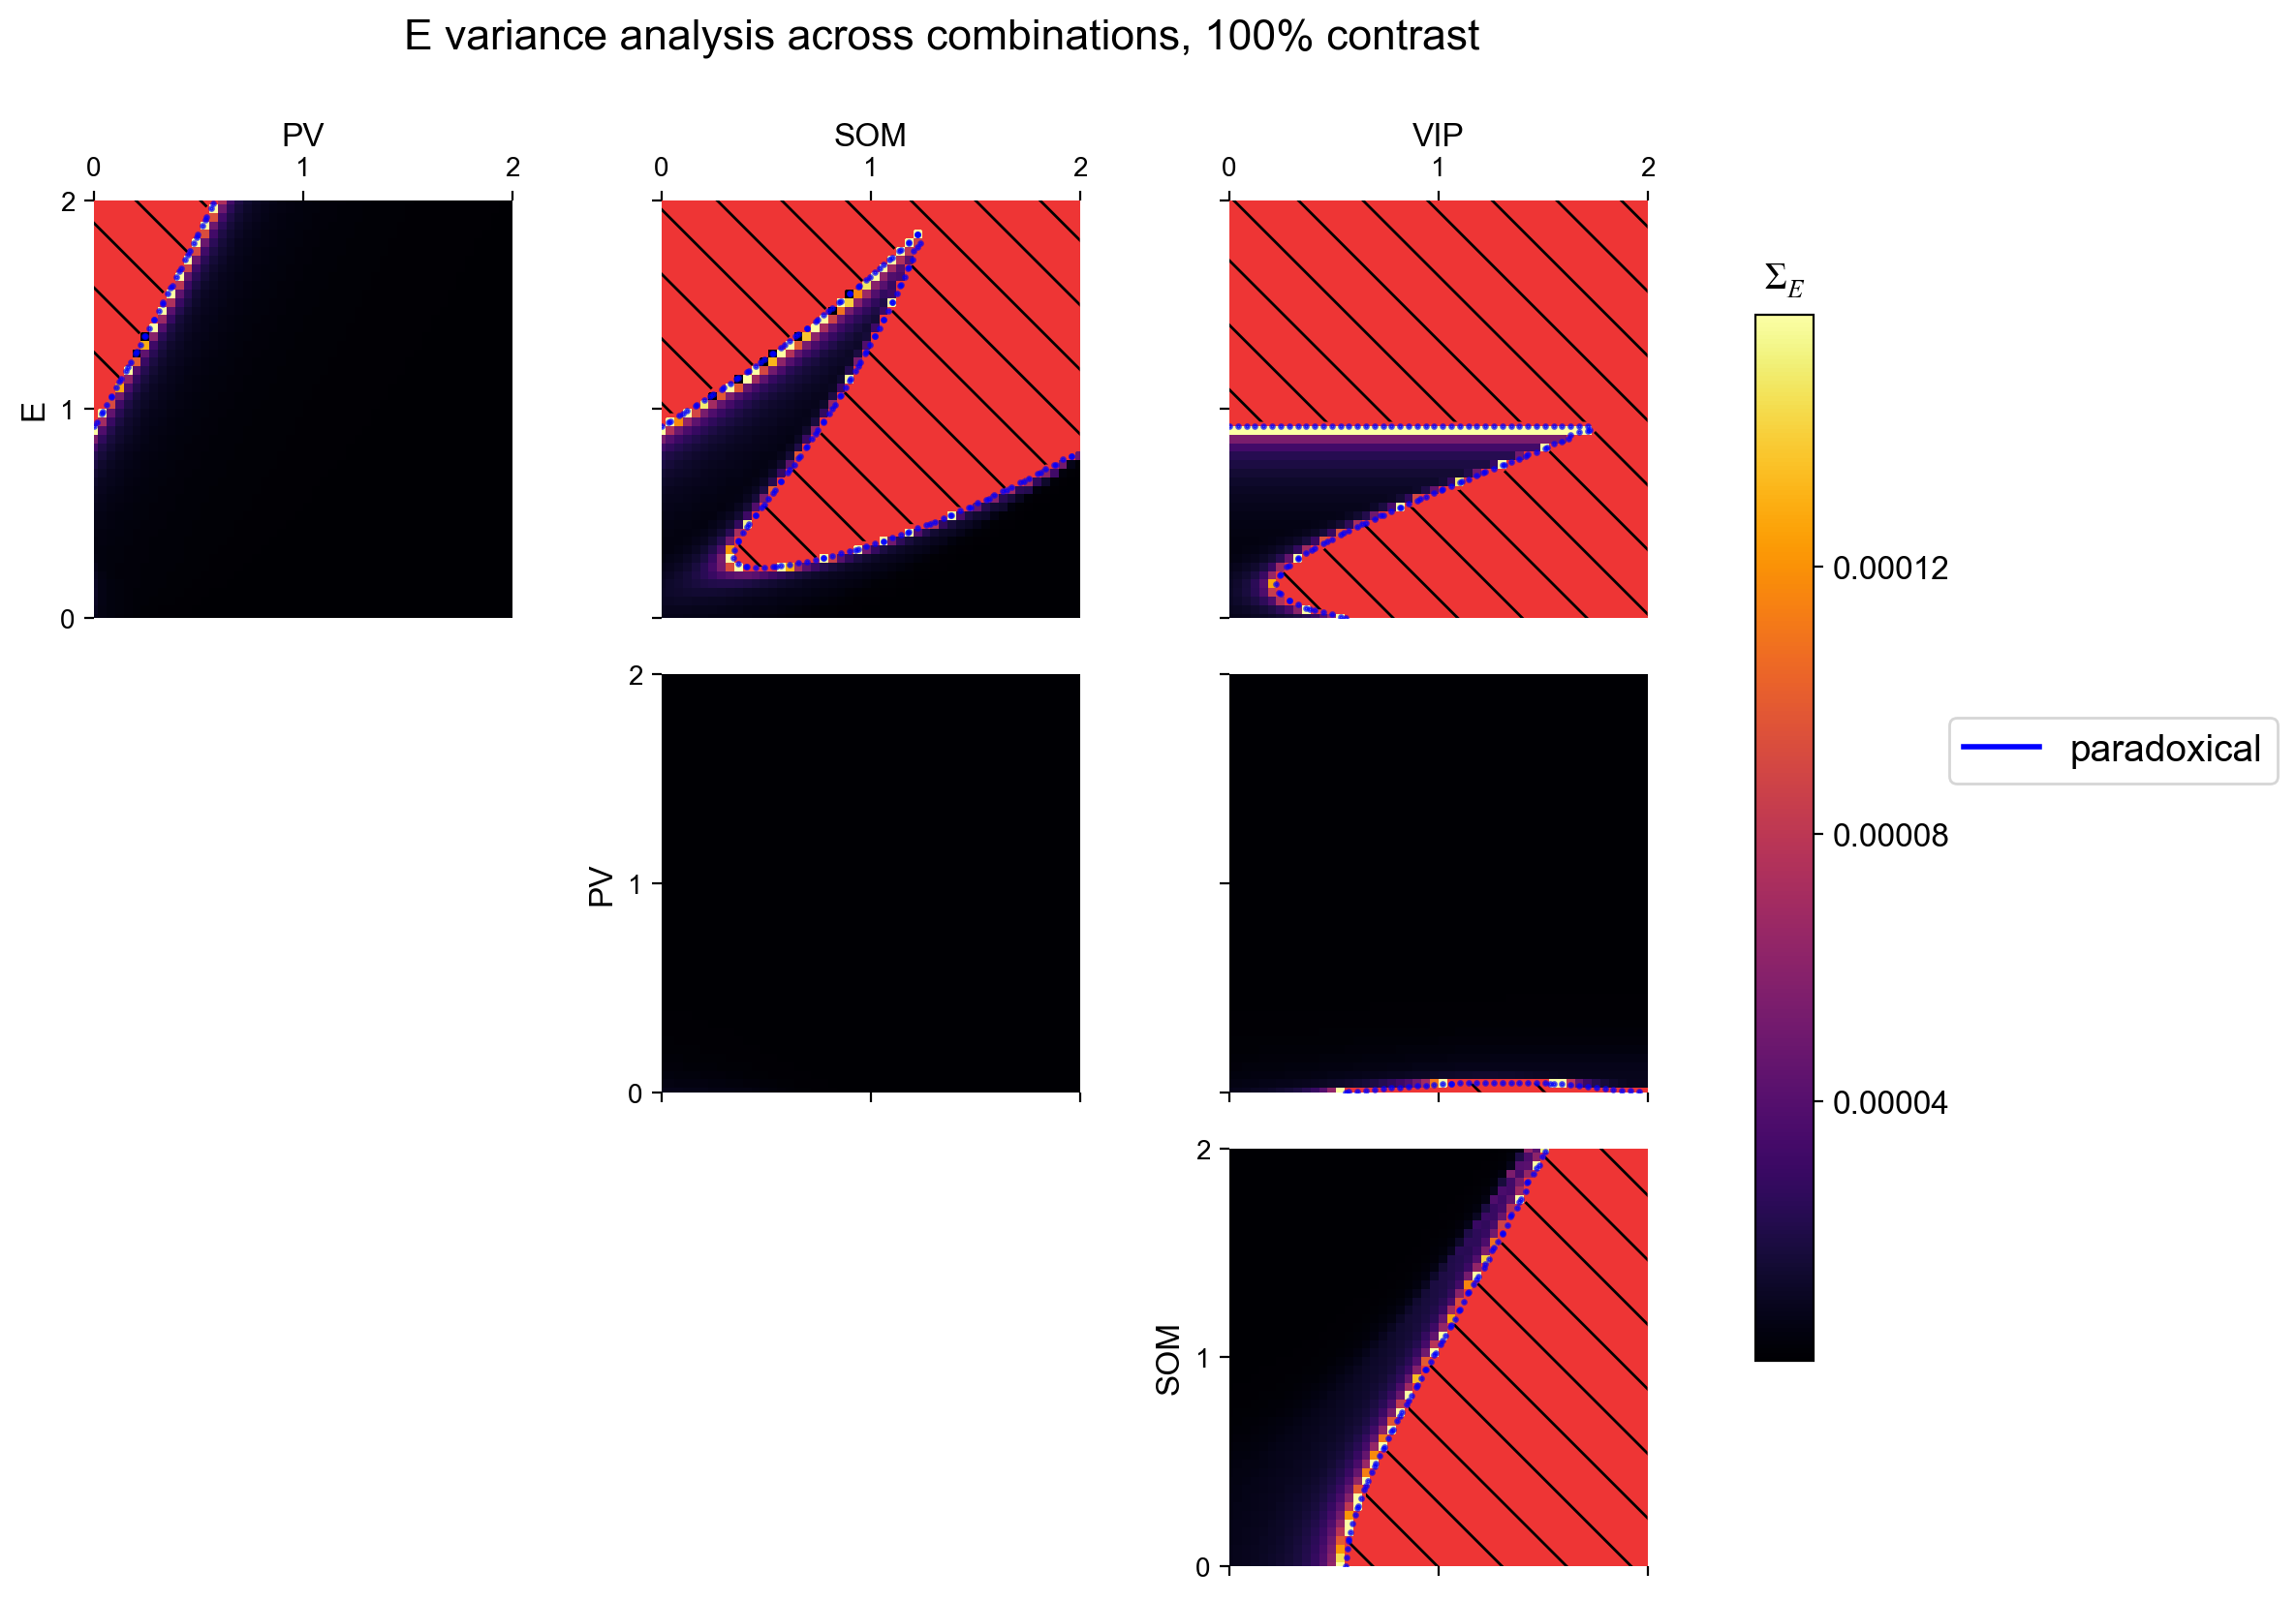

In [137]:
# combinations of external inputs to two populations for single fit/contrast

lims = [0,2]
points = 50
param_plot ='variance'
pop_plot = 'E'

fig = plot_heatmap_combinations_any(fit_c, params, contrast, lims, points, TAU, 
                          sigma_noise, tau_noise, variable, noise_type, k,
                          param_plot=param_plot, pop_plot=pop_plot, hatched=True, savefig=False)


### comparative analysis

/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:1622: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


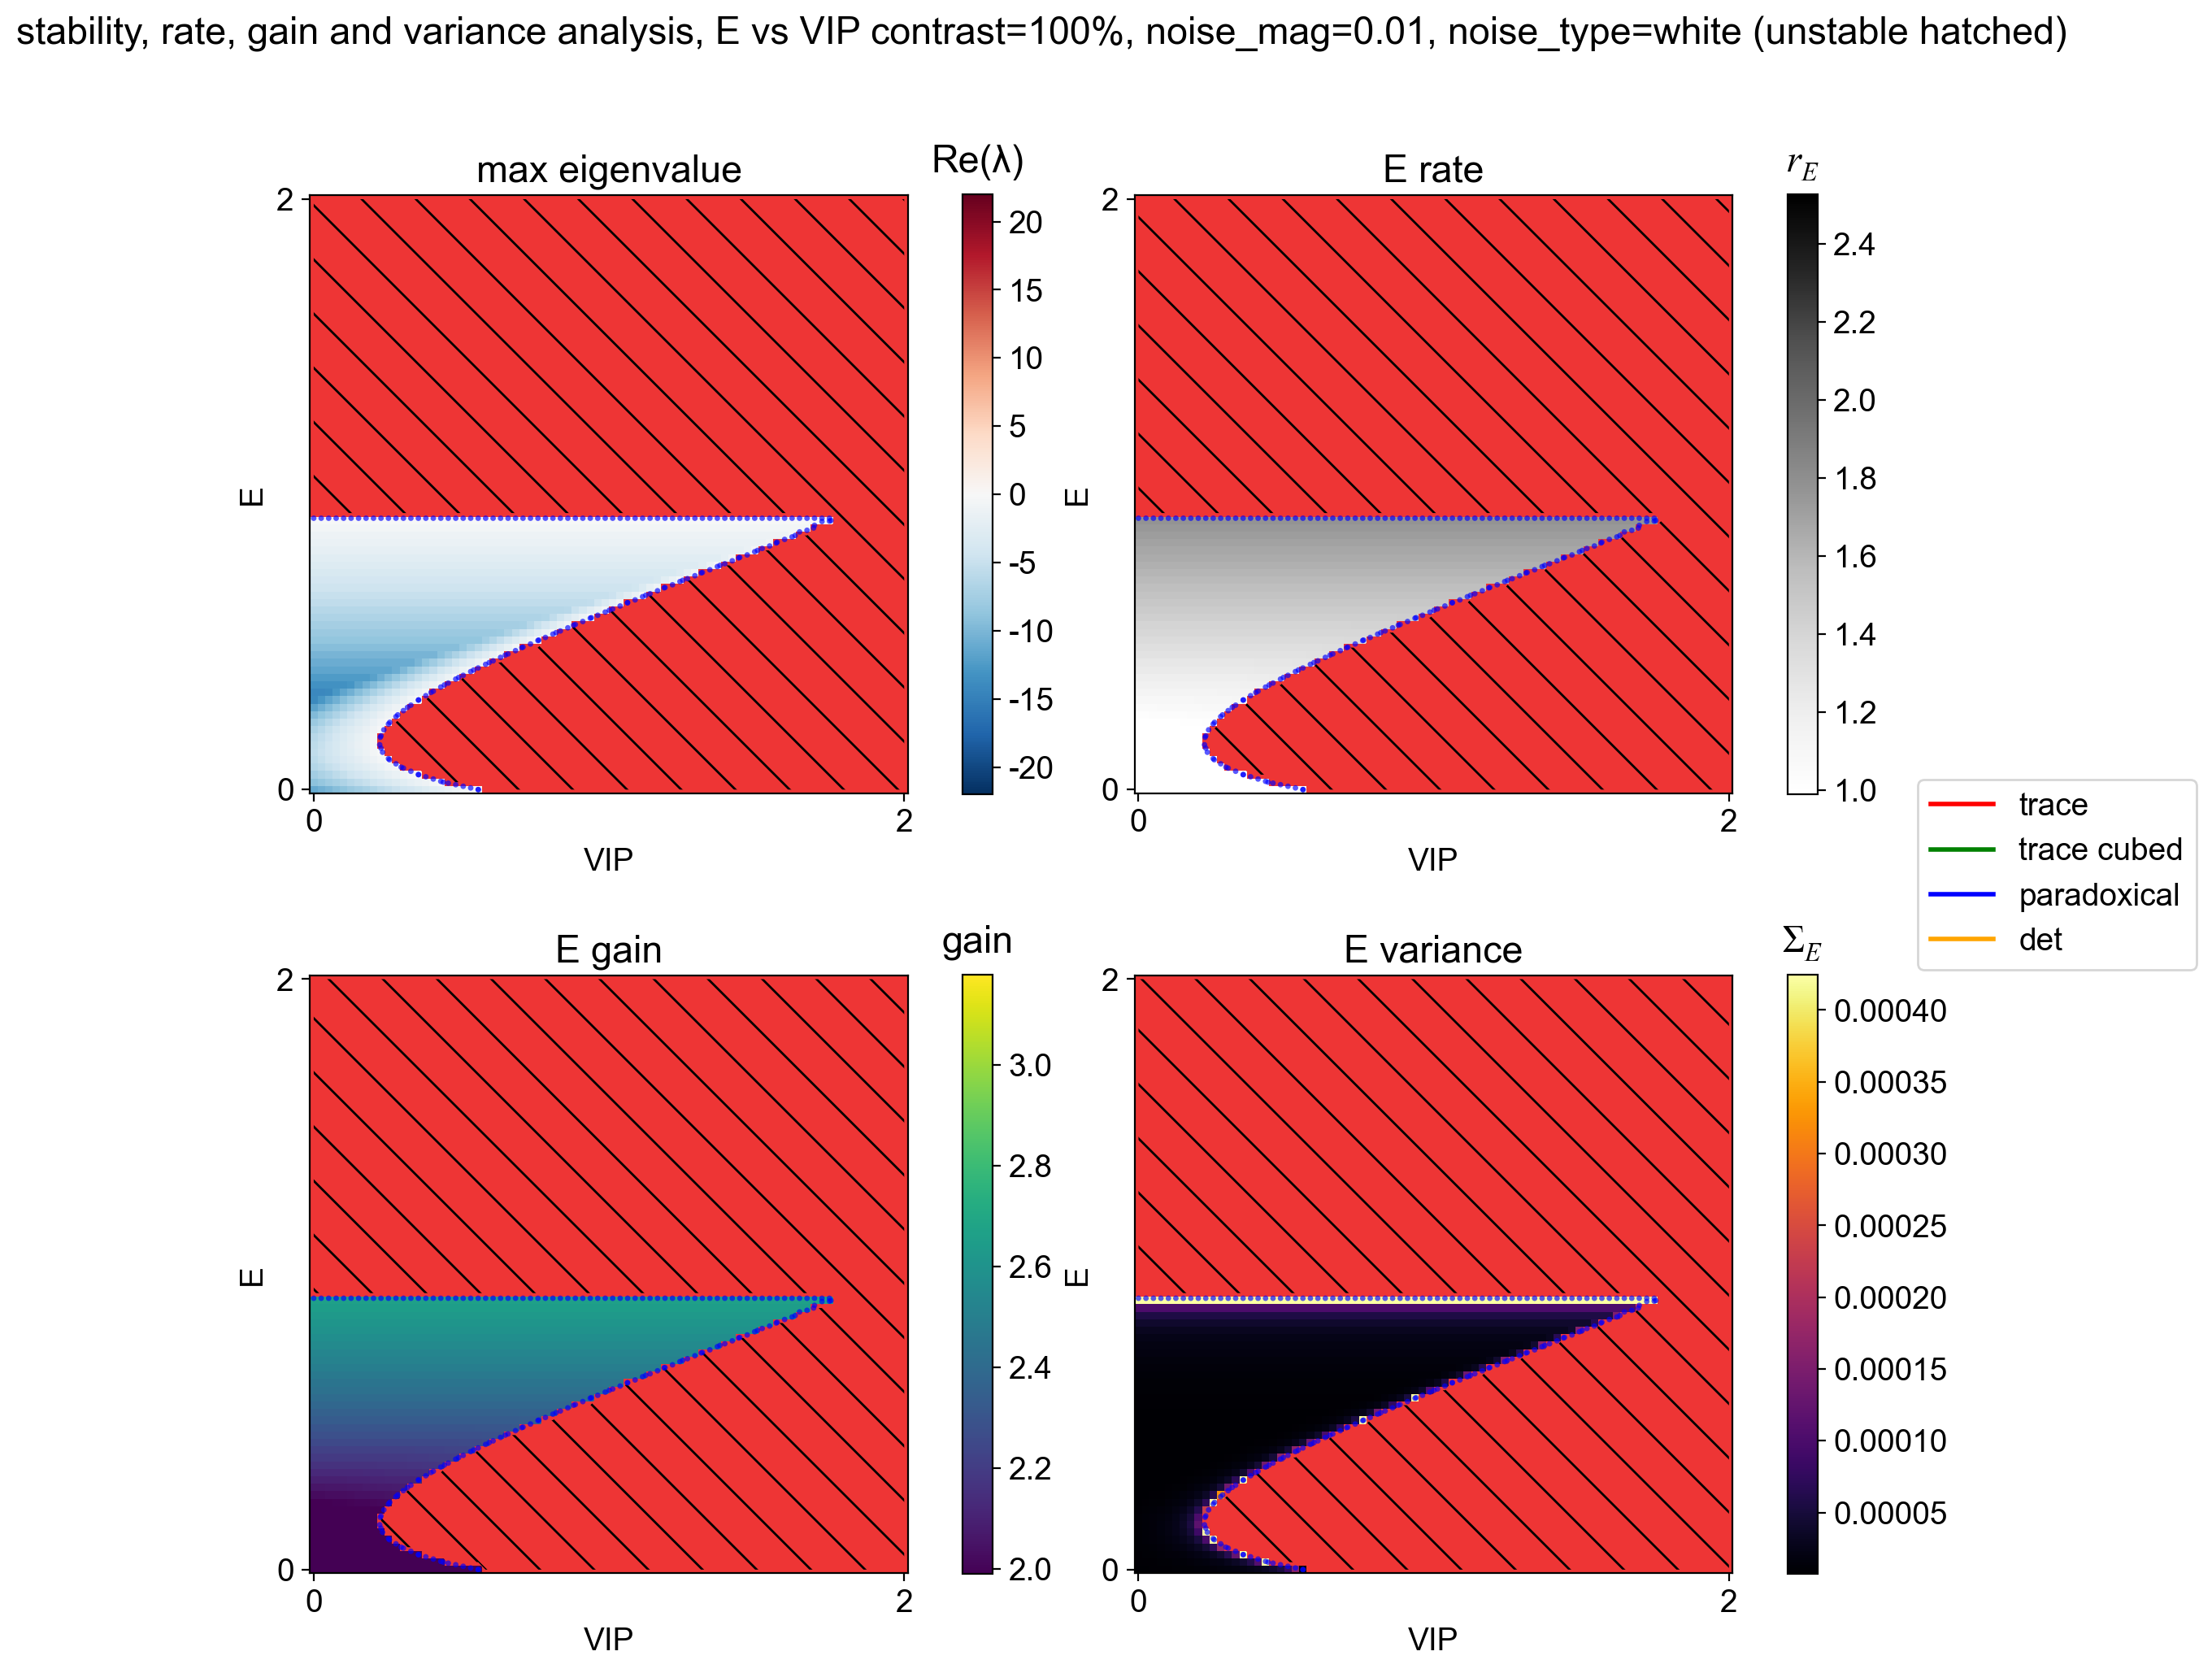

In [138]:
# all 4 analytics for single fit/contrast

lims = [0, 2]
pop1 = 'E'
pop2 = 'V'
points = 80
pop_plot = 'E'

fig = plot_stab_rate_gain_var_single(fit_c, params, lims, points, pop1, pop2, 
                                     contrast, sigma_noise, TAU, tau_noise, variable, noise_type, k, pop_plot='E', hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite


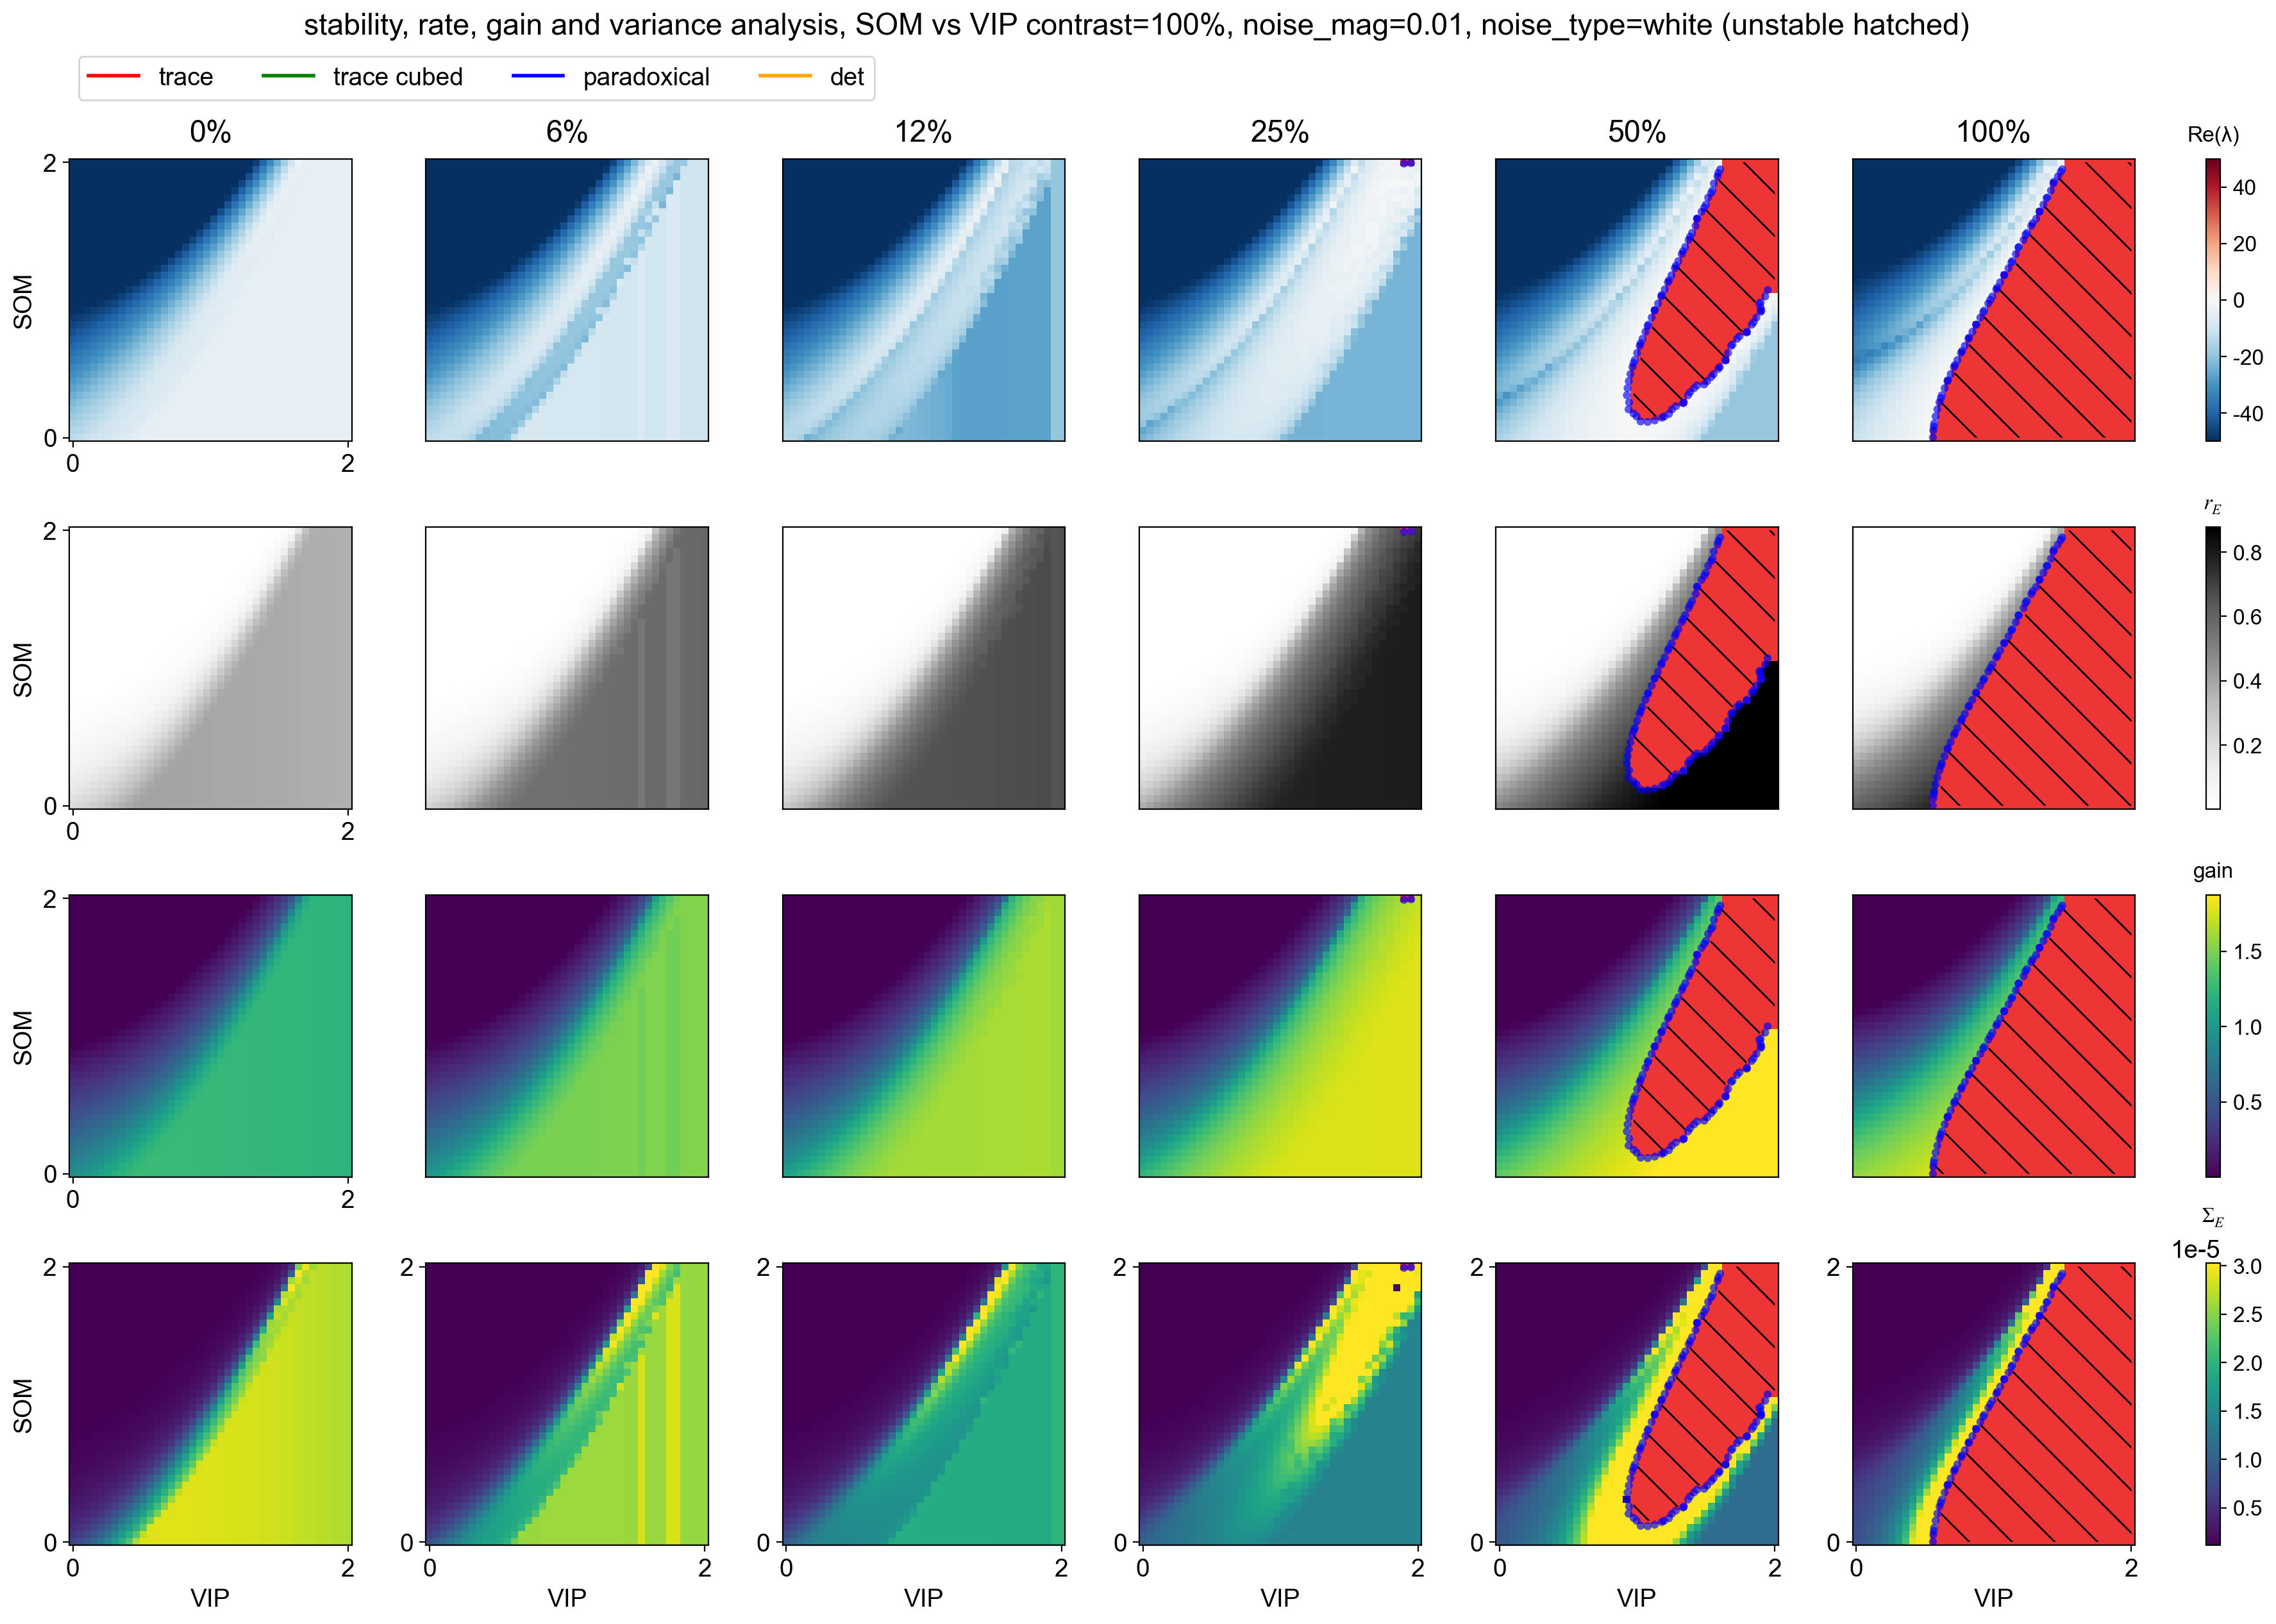

In [139]:
# all 4 analytics across contrasts

lims = [0, 2]
pop1 = 'S'
pop2 = 'V'
points = 40
pop_plot = 'E'

fig = plot_stab_rate_gain_var_grid(fit_c, params, c_range, lims, points, TAU, pop1, pop2, 
                                   sigma_noise, tau_noise, variable, noise_type, k, pop_plot=pop_plot, hatched=True, savefig=False)


/Users/lukej/Documents/Gatsby/code/scripts_new/simulation_functions.py:156: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return scipy.linalg.solve_continuous_lyapunov(A, Q) # note Q positive definite
/Users/lukej/Documents/Gatsby/code/scripts_new/analytics_functions.py:2122: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.99, 0.95])


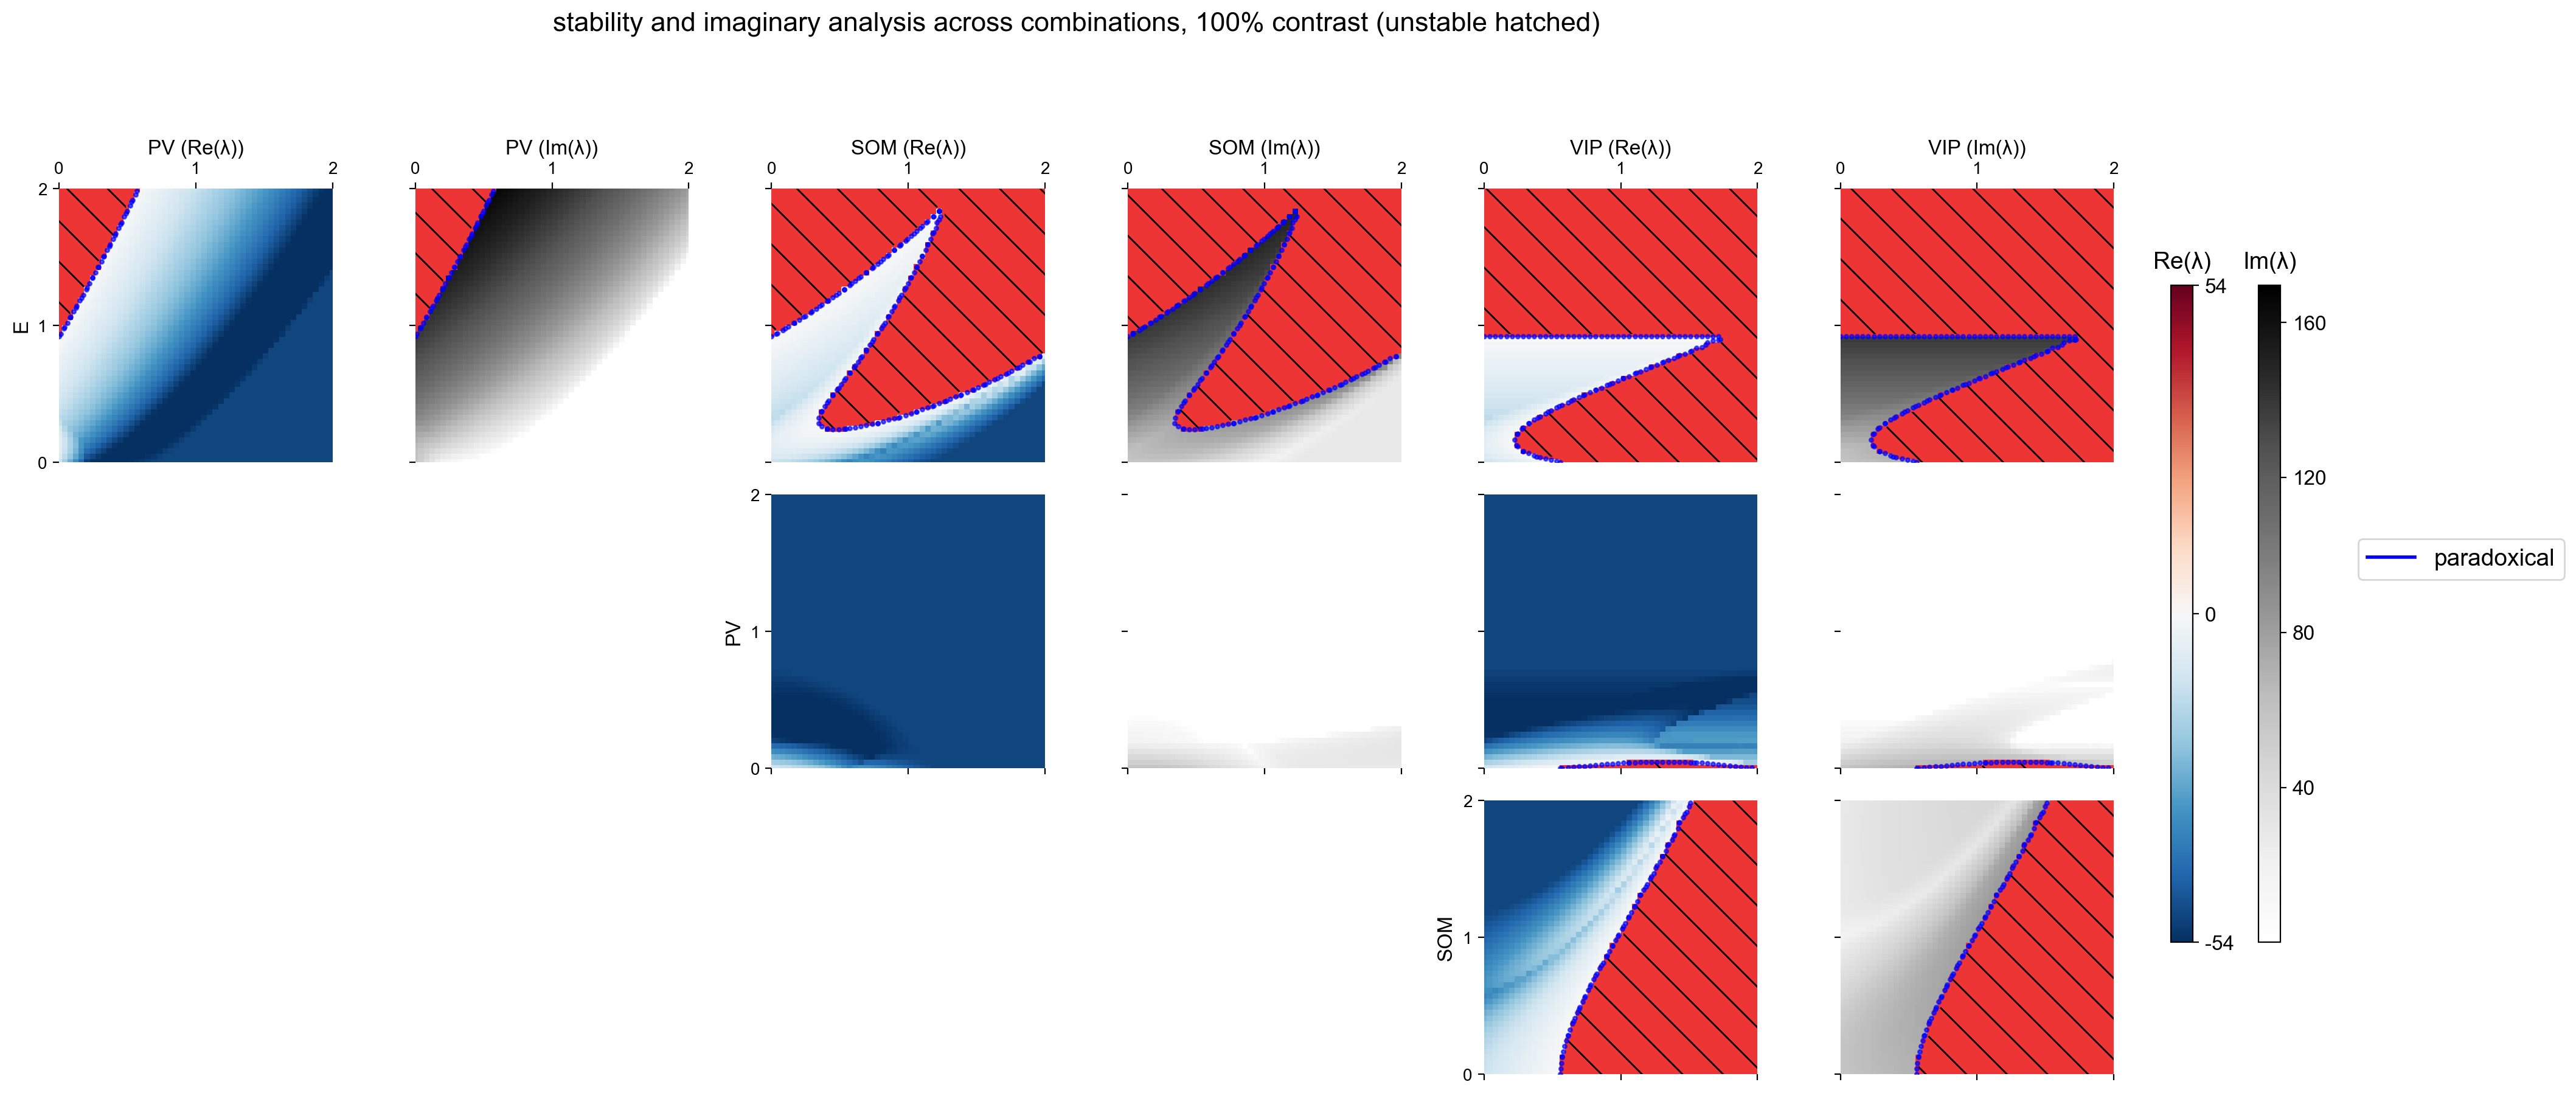

In [ ]:
# compare two analytics across combinations of inputs, for single fit/contrast

lims = [0, 2]
points = 50
pop_plot = 'E'
param1 = 'stability' # {'stability', 'imaginary', 'rate', 'gain', 'variance'}
param2 = 'imaginary' # {'stability', 'imaginary', 'rate', 'gain', 'variance'}

fig = plot_dual_param_combinations(fit_c, params, contrast, lims, points, TAU, 
                                sigma_noise, tau_noise, variable, noise_type, k,
                                param1=param1, param2=param2, pop_plot='E', hatched=True, savefig=False)


### max eigenvalue paths

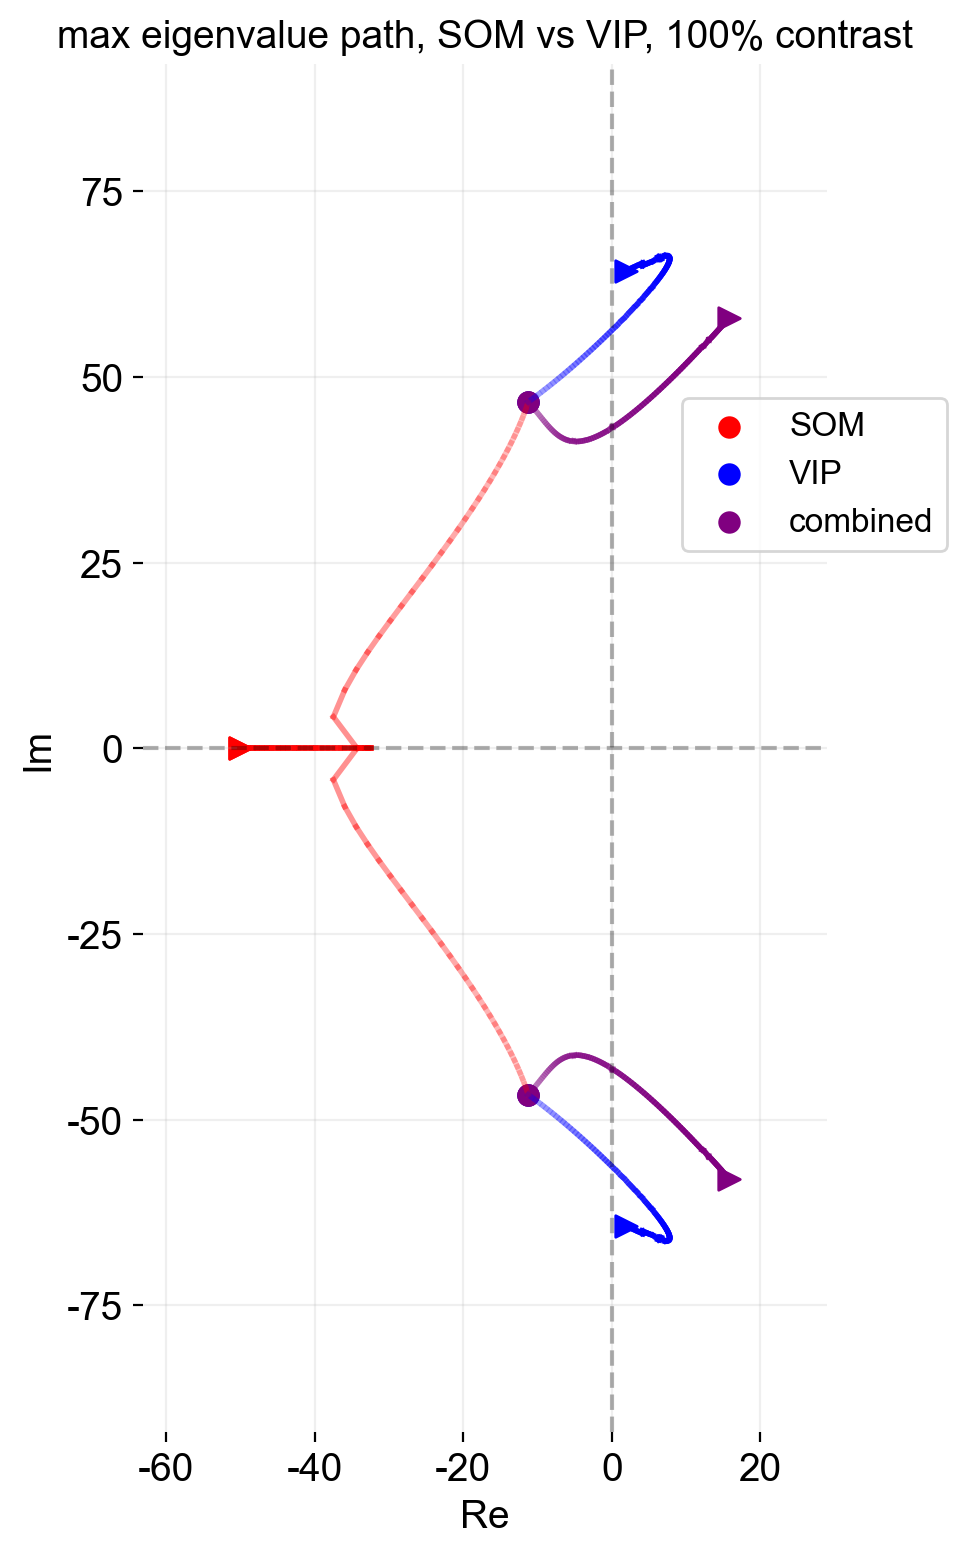

In [167]:
# max eigenvalue paths for single fit/contrast

lims = [0, 2]
points = 100
pop1 = 'S'
pop2 = 'V'

fig, ax = plot_eigenvalue_paths(fit_c, params, contrast, lims, points, TAU, pop1, pop2, k, savefig=False)


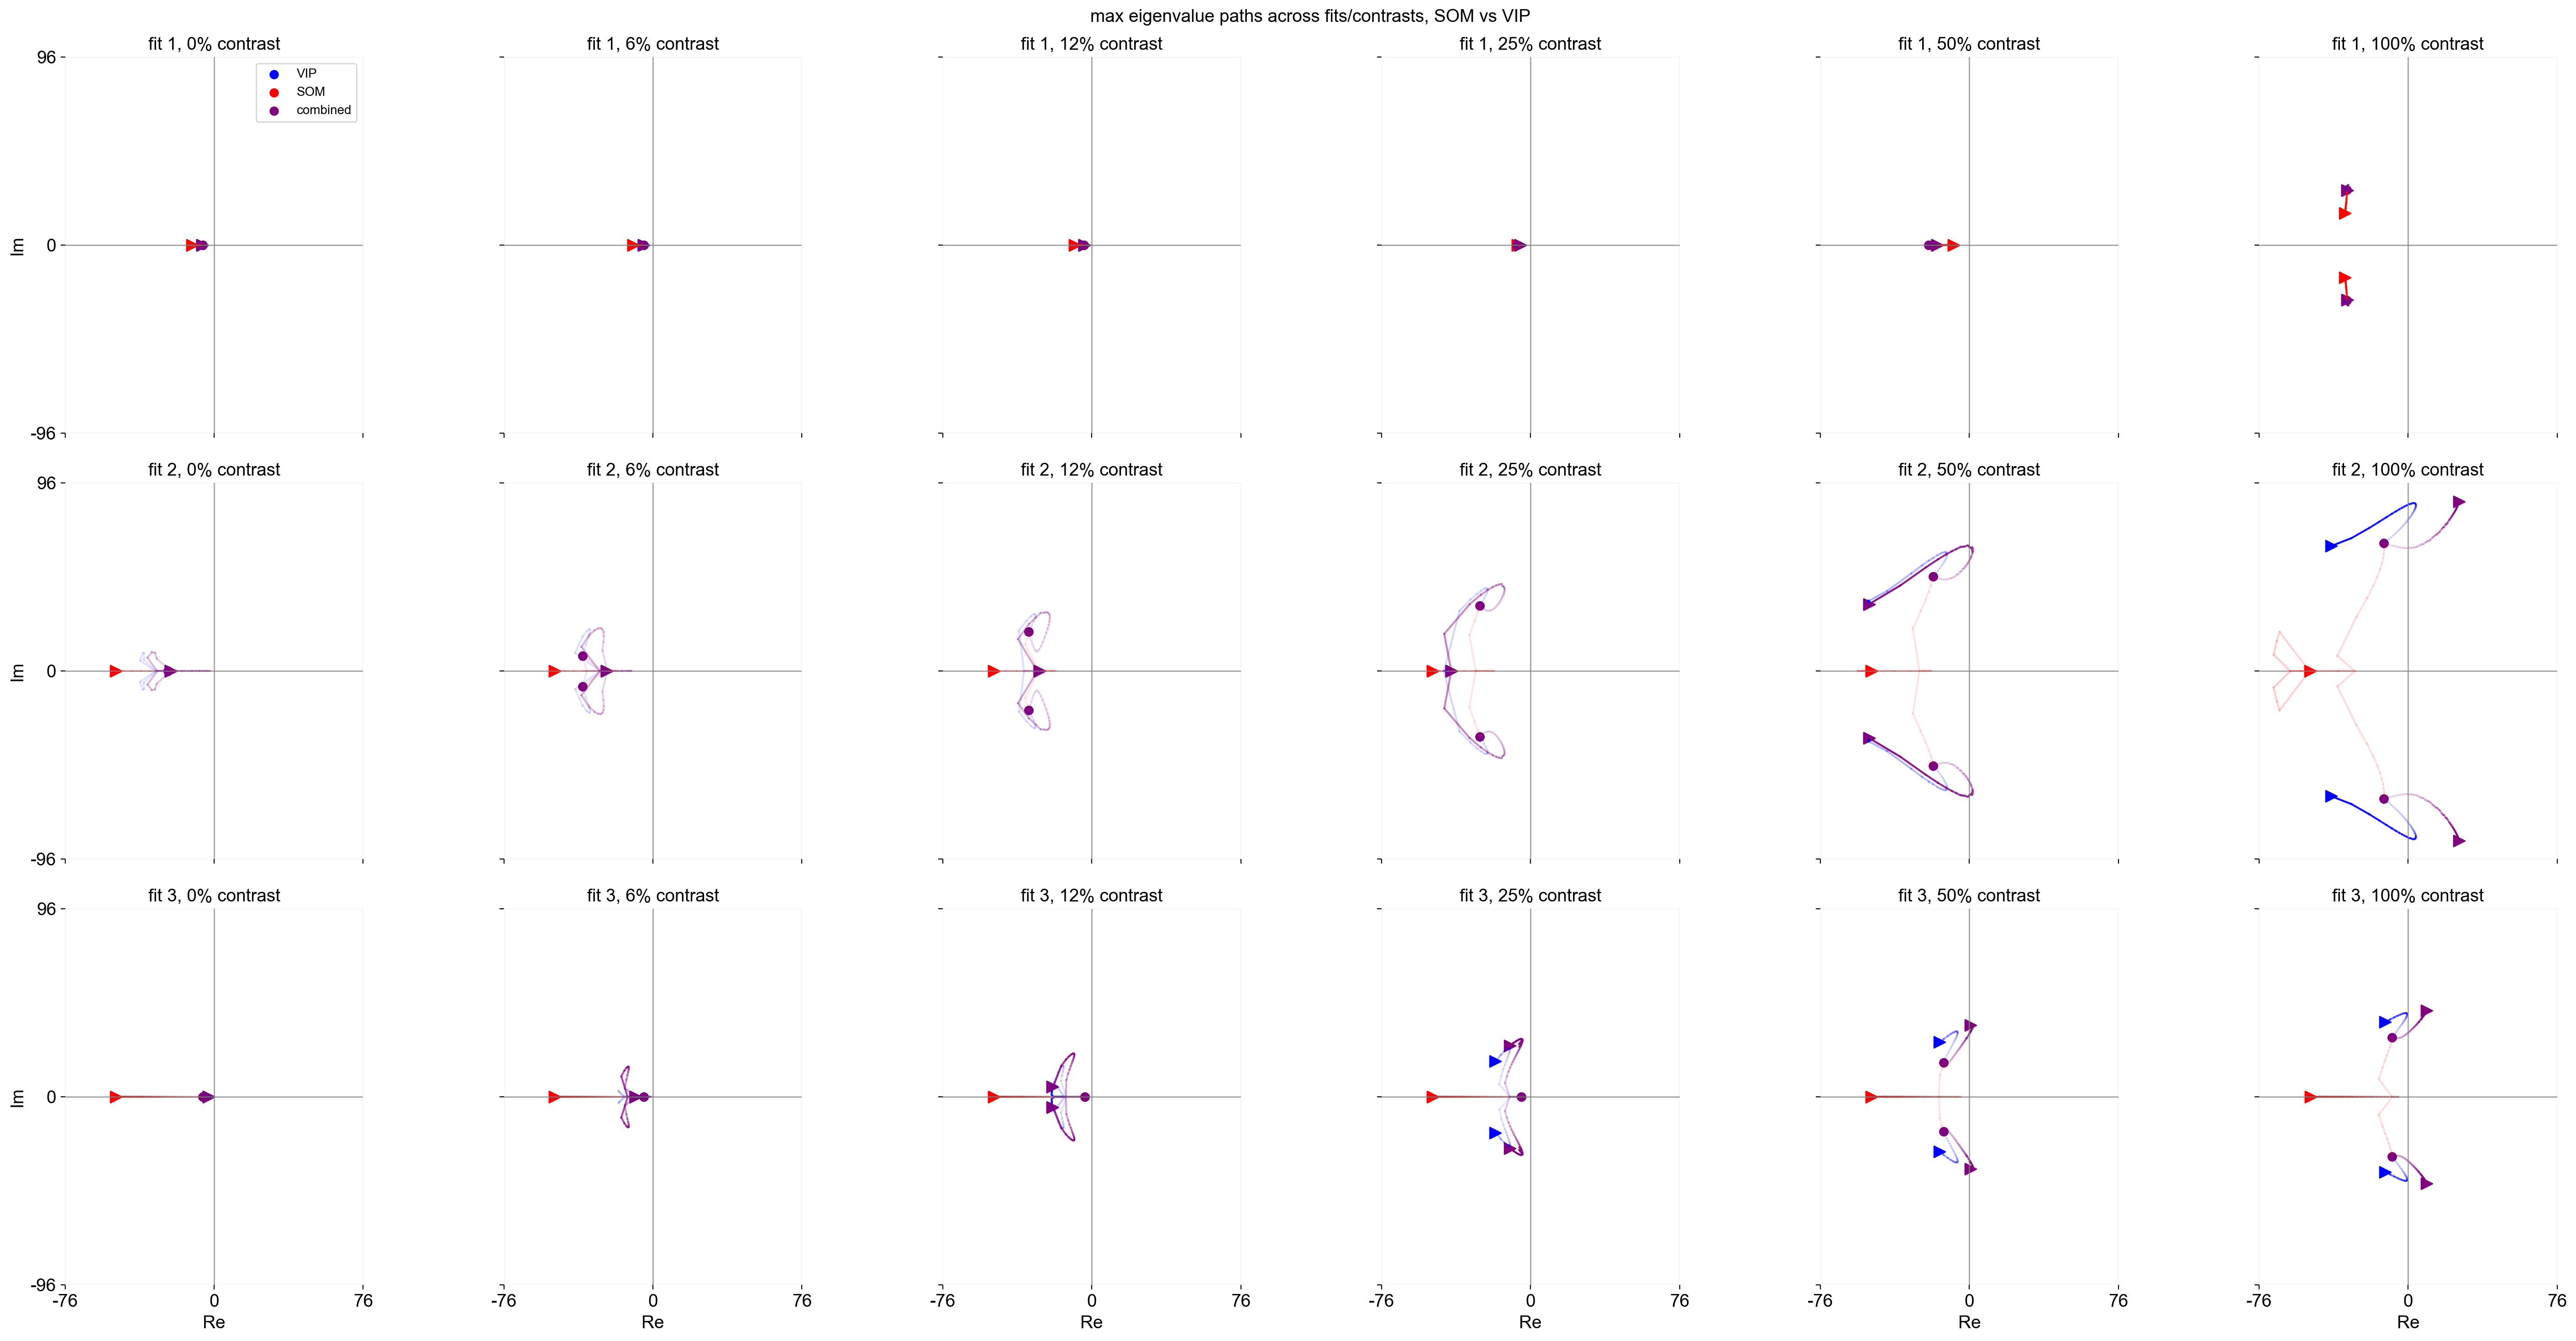

In [88]:
# max eigenvalue paths across fits/contrasts

top_k = 3
params_list, fits_list = get_params_fits_list(top_params, top_fits, c_range, top_k=top_k, random=False)
lims = [0,2]
points = 50
pop1 = 'S'
pop2 = 'V'

fig, axes = plot_eigenvalue_path_grid(params_list, fits_list, c_range, lims, points, TAU, pop1, pop2, savefig=False)


### stability scan

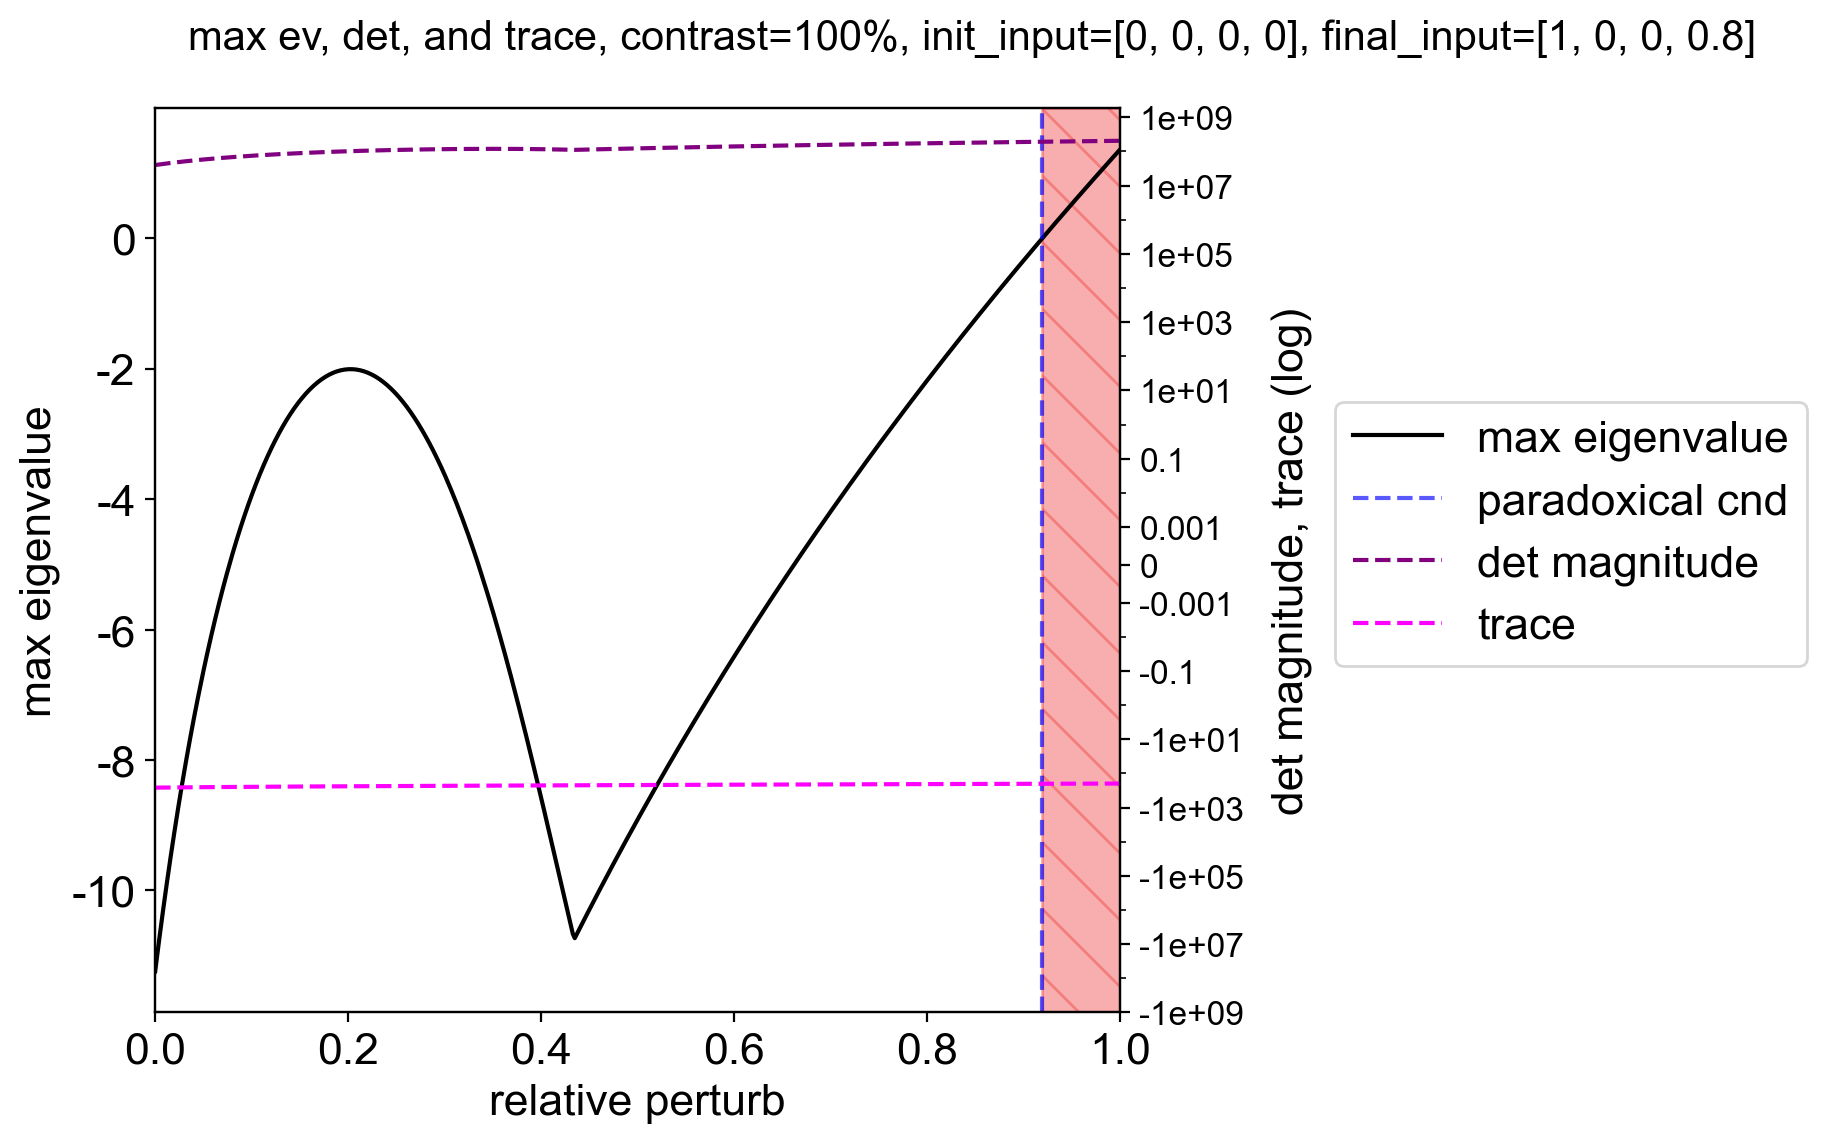

In [ ]:
# scan between two input vectors for single fit/contrast

contrast = 1 
init_perturb = np.array([0, 0, 0, 0])  # initial external input
final_perturb = np.array([1, 0, 0, 0.8])  # final external input
points = 500 # number of points in scan

fig, data_dict = stability_scan_analysis_and_plot(fit_c, params, contrast, init_perturb, final_perturb, points, TAU, k, plot_stability_lines=True, plot_max_ev=True, plot_det=True, plot_trace=True, hatched=True, savefig=False)


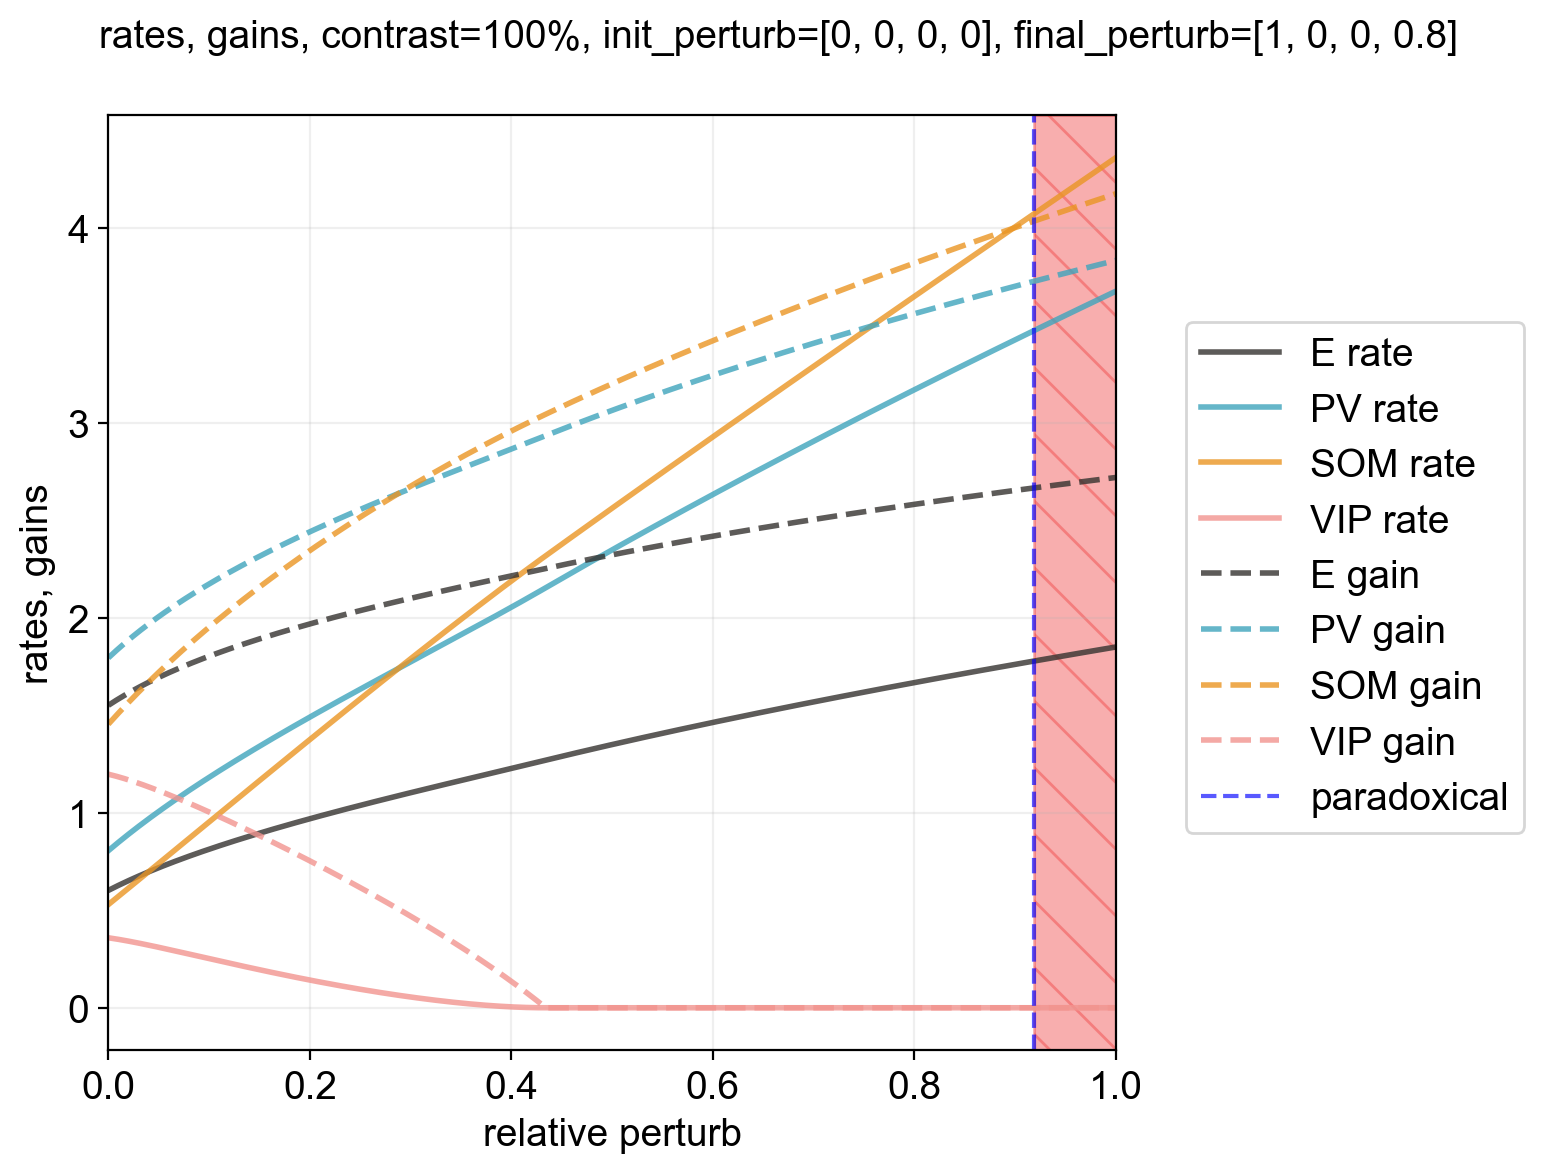

In [142]:
# rates and gains for scan

fig = plot_rates_gains_from_data(data_dict, plot_stability_lines=True, plot_rates=True, plot_gains=True, scale='linear', hatched=True, savefig=False)

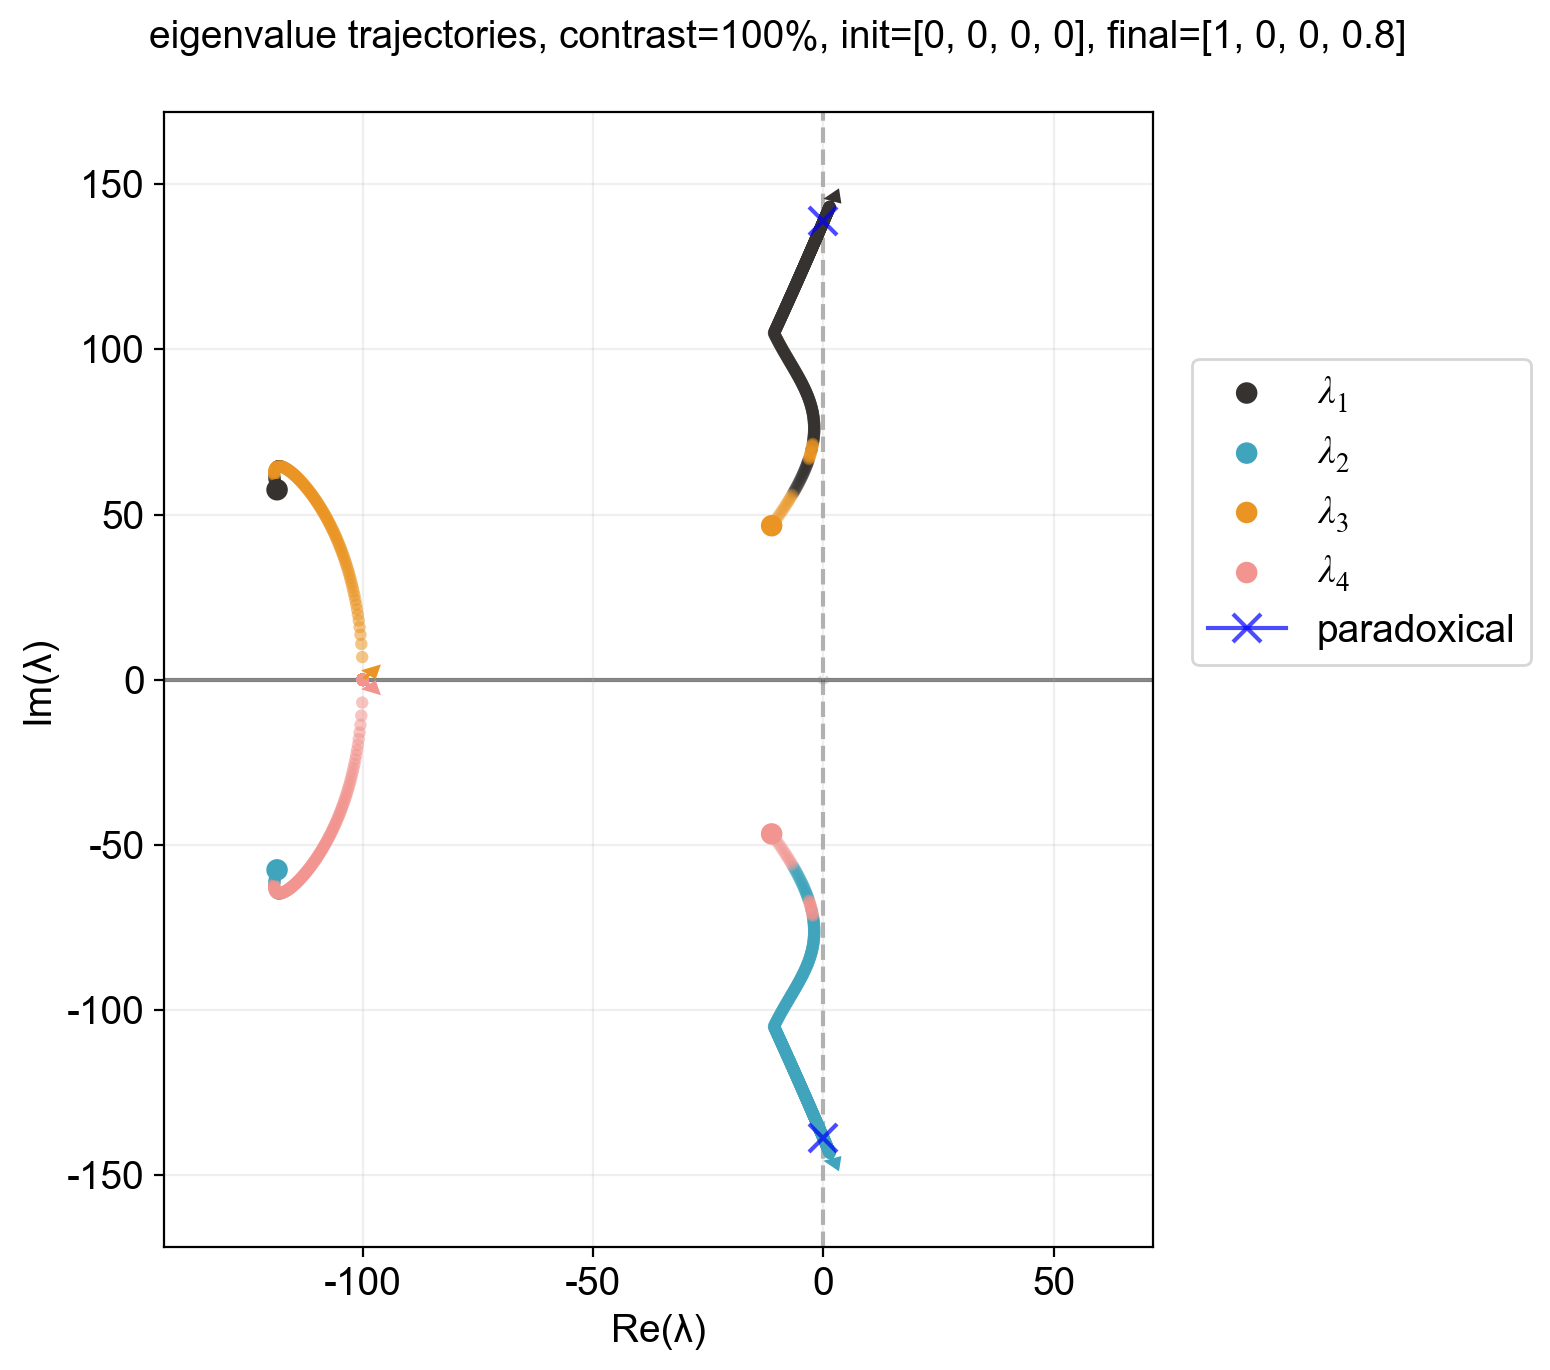

In [168]:
# eigenvalue trajectories for single fit/contrast (note ev order 'switches' so ignore colours)

fig = plot_eigenvalue_scatter_from_data(data_dict, savefig=False)
